# Mixture Density Networks

I recently got interested in Mixture Density Networks. The 30,000ft overview of an MDN is that it is great at modelling inverse problems. Given a set of medical symptoms, what is the probability the patient has each of the examined diseases? Given a desired location, what are the required joint angles of a robot arm? These inverse problems are the type that MDNs are good at solving. [David Ha](http://blog.otoro.net/2015/11/24/mixture-density-networks-with-tensorflow/) has a great blog post on this. Here I will try to implemement a Keras version of an MDN.

Below I am modelling the sinusoid equation plus gaussian random noise, $\epsilon$.  

$$y = 7.0sin(0.75x) + 0.5x +  \epsilon$$

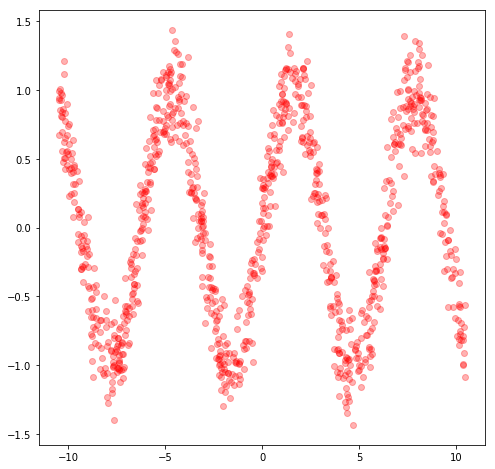

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import math

NSAMPLE = 1000
x_data = np.float32(np.random.uniform(-10.5, 10.5, (1, NSAMPLE))).T
noise_data = np.float32(np.random.normal(size=(NSAMPLE,1)))
# y_data = np.float32(np.sin(0.75*x_data)*7.0+x_data*0.5+noise_data*1.0)

y_data = np.float32(np.sin(x_data)+0.2*noise_data)

plt.figure(figsize=(8, 8))
plot_out = plt.plot(x_data,y_data,'ro',alpha=0.3)
plt.show()

Now I will built a simple neural network in model this sinusoidal data. It will have one hidden layer of 20 nodes, each with a hyperbolic tangent (tanh) activation. We will use a fancy schmancy RMSprop optimizer to decay the learning rate by 20% each iteration from 0.1. Finally, we will compile and train the model for 20000 iterations. 

In [47]:
from keras.models import Sequential
from keras.layers import Dense

In [38]:
model = Sequential()
model.add(Dense(20, input_dim=1, activation='tanh'))
model.add(Dense(1, activation=None))

model.compile(loss='mean_squared_error', optimizer='sgd')

In [39]:
history = model.fit(x_data, y_data, validation_split=0.3, epochs=15000, verbose=1)
print ('model trained!')

Train on 700 samples, validate on 300 samples
Epoch 1/20000
700/700 [==============================] - 0s - loss: 0.5132 - val_loss: 0.5237
Epoch 2/20000
700/700 [==============================] - 0s - loss: 0.4990 - val_loss: 0.5203
Epoch 3/20000
700/700 [==============================] - 0s - loss: 0.4941 - val_loss: 0.5145
Epoch 4/20000
700/700 [==============================] - 0s - loss: 0.4900 - val_loss: 0.5112
Epoch 5/20000
700/700 [==============================] - 0s - loss: 0.4877 - val_loss: 0.5067
Epoch 6/20000
700/700 [==============================] - 0s - loss: 0.4794 - val_loss: 0.5052
Epoch 7/20000
700/700 [==============================] - 0s - loss: 0.4768 - val_loss: 0.4986
Epoch 8/20000
700/700 [==============================] - 0s - loss: 0.4744 - val_loss: 0.4948
Epoch 9/20000
700/700 [==============================] - 0s - loss: 0.4705 - val_loss: 0.5011
Epoch 10/20000
700/700 [==============================] - 0s - loss: 0.4638 - val_loss: 0.4947
Epoch 11/2000

700/700 [==============================] - 0s - loss: 0.3491 - val_loss: 0.3751
Epoch 87/20000
700/700 [==============================] - 0s - loss: 0.3488 - val_loss: 0.3732
Epoch 88/20000
700/700 [==============================] - 0s - loss: 0.3493 - val_loss: 0.3735
Epoch 89/20000
700/700 [==============================] - 0s - loss: 0.3469 - val_loss: 0.3726
Epoch 90/20000
700/700 [==============================] - 0s - loss: 0.3466 - val_loss: 0.3727
Epoch 91/20000
700/700 [==============================] - 0s - loss: 0.3488 - val_loss: 0.3809
Epoch 92/20000
700/700 [==============================] - 0s - loss: 0.3451 - val_loss: 0.3881
Epoch 93/20000
700/700 [==============================] - 0s - loss: 0.3463 - val_loss: 0.3711
Epoch 94/20000
700/700 [==============================] - 0s - loss: 0.3497 - val_loss: 0.3713
Epoch 95/20000
700/700 [==============================] - 0s - loss: 0.3477 - val_loss: 0.3711
Epoch 96/20000
700/700 [==============================] - 0s - lo

700/700 [==============================] - 0s - loss: 0.3292 - val_loss: 0.3607
Epoch 172/20000
700/700 [==============================] - 0s - loss: 0.3299 - val_loss: 0.3604
Epoch 173/20000
700/700 [==============================] - 0s - loss: 0.3298 - val_loss: 0.3610
Epoch 174/20000
700/700 [==============================] - 0s - loss: 0.3312 - val_loss: 0.3690
Epoch 175/20000
700/700 [==============================] - 0s - loss: 0.3309 - val_loss: 0.3604
Epoch 176/20000
700/700 [==============================] - 0s - loss: 0.3299 - val_loss: 0.3580
Epoch 177/20000
700/700 [==============================] - 0s - loss: 0.3298 - val_loss: 0.3585
Epoch 178/20000
700/700 [==============================] - 0s - loss: 0.3305 - val_loss: 0.3586
Epoch 179/20000
700/700 [==============================] - 0s - loss: 0.3315 - val_loss: 0.3579
Epoch 180/20000
700/700 [==============================] - 0s - loss: 0.3334 - val_loss: 0.3582
Epoch 181/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3272 - val_loss: 0.3529
Epoch 257/20000
700/700 [==============================] - 0s - loss: 0.3241 - val_loss: 0.3527
Epoch 258/20000
700/700 [==============================] - 0s - loss: 0.3269 - val_loss: 0.3526
Epoch 259/20000
700/700 [==============================] - 0s - loss: 0.3244 - val_loss: 0.3560
Epoch 260/20000
700/700 [==============================] - 0s - loss: 0.3239 - val_loss: 0.3551
Epoch 261/20000
700/700 [==============================] - 0s - loss: 0.3245 - val_loss: 0.3545
Epoch 262/20000
700/700 [==============================] - 0s - loss: 0.3233 - val_loss: 0.3533
Epoch 263/20000
700/700 [==============================] - 0s - loss: 0.3229 - val_loss: 0.3523
Epoch 264/20000
700/700 [==============================] - 0s - loss: 0.3216 - val_loss: 0.3586
Epoch 265/20000
700/700 [==============================] - 0s - loss: 0.3223 - val_loss: 0.3522
Epoch 266/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3176 - val_loss: 0.3491
Epoch 342/20000
700/700 [==============================] - 0s - loss: 0.3205 - val_loss: 0.3497
Epoch 343/20000
700/700 [==============================] - 0s - loss: 0.3185 - val_loss: 0.3493
Epoch 344/20000
700/700 [==============================] - 0s - loss: 0.3177 - val_loss: 0.3514
Epoch 345/20000
700/700 [==============================] - 0s - loss: 0.3168 - val_loss: 0.3526
Epoch 346/20000
700/700 [==============================] - 0s - loss: 0.3177 - val_loss: 0.3496
Epoch 347/20000
700/700 [==============================] - 0s - loss: 0.3216 - val_loss: 0.3511
Epoch 348/20000
700/700 [==============================] - 0s - loss: 0.3172 - val_loss: 0.3495
Epoch 349/20000
700/700 [==============================] - 0s - loss: 0.3182 - val_loss: 0.3491
Epoch 350/20000
700/700 [==============================] - 0s - loss: 0.3190 - val_loss: 0.3490
Epoch 351/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3172 - val_loss: 0.3547
Epoch 427/20000
700/700 [==============================] - 0s - loss: 0.3156 - val_loss: 0.3471
Epoch 428/20000
700/700 [==============================] - 0s - loss: 0.3139 - val_loss: 0.3468
Epoch 429/20000
700/700 [==============================] - 0s - loss: 0.3152 - val_loss: 0.3487
Epoch 430/20000
700/700 [==============================] - 0s - loss: 0.3137 - val_loss: 0.3467
Epoch 431/20000
700/700 [==============================] - 0s - loss: 0.3133 - val_loss: 0.3530
Epoch 432/20000
700/700 [==============================] - 0s - loss: 0.3186 - val_loss: 0.3469
Epoch 433/20000
700/700 [==============================] - 0s - loss: 0.3208 - val_loss: 0.3483
Epoch 434/20000
700/700 [==============================] - 0s - loss: 0.3176 - val_loss: 0.3521
Epoch 435/20000
700/700 [==============================] - 0s - loss: 0.3179 - val_loss: 0.3465
Epoch 436/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3110 - val_loss: 0.3469
Epoch 512/20000
700/700 [==============================] - 0s - loss: 0.3113 - val_loss: 0.3459
Epoch 513/20000
700/700 [==============================] - 0s - loss: 0.3131 - val_loss: 0.3448
Epoch 514/20000
700/700 [==============================] - 0s - loss: 0.3121 - val_loss: 0.3446
Epoch 515/20000
700/700 [==============================] - 0s - loss: 0.3151 - val_loss: 0.3526
Epoch 516/20000
700/700 [==============================] - 0s - loss: 0.3135 - val_loss: 0.3503
Epoch 517/20000
700/700 [==============================] - 0s - loss: 0.3134 - val_loss: 0.3450
Epoch 518/20000
700/700 [==============================] - 0s - loss: 0.3136 - val_loss: 0.3606
Epoch 519/20000
700/700 [==============================] - 0s - loss: 0.3142 - val_loss: 0.3569
Epoch 520/20000
700/700 [==============================] - 0s - loss: 0.3127 - val_loss: 0.3454
Epoch 521/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3145 - val_loss: 0.3454
Epoch 597/20000
700/700 [==============================] - 0s - loss: 0.3149 - val_loss: 0.3477
Epoch 598/20000
700/700 [==============================] - 0s - loss: 0.3075 - val_loss: 0.3724
Epoch 599/20000
700/700 [==============================] - 0s - loss: 0.3112 - val_loss: 0.3485
Epoch 600/20000
700/700 [==============================] - 0s - loss: 0.3107 - val_loss: 0.3451
Epoch 601/20000
700/700 [==============================] - 0s - loss: 0.3107 - val_loss: 0.3465
Epoch 602/20000
700/700 [==============================] - 0s - loss: 0.3095 - val_loss: 0.3440
Epoch 603/20000
700/700 [==============================] - 0s - loss: 0.3096 - val_loss: 0.3430
Epoch 604/20000
700/700 [==============================] - 0s - loss: 0.3075 - val_loss: 0.3470
Epoch 605/20000
700/700 [==============================] - 0s - loss: 0.3109 - val_loss: 0.3432
Epoch 606/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3085 - val_loss: 0.3420
Epoch 682/20000
700/700 [==============================] - 0s - loss: 0.3095 - val_loss: 0.3421
Epoch 683/20000
700/700 [==============================] - 0s - loss: 0.3081 - val_loss: 0.3417
Epoch 684/20000
700/700 [==============================] - 0s - loss: 0.3095 - val_loss: 0.3432
Epoch 685/20000
700/700 [==============================] - 0s - loss: 0.3106 - val_loss: 0.3458
Epoch 686/20000
700/700 [==============================] - 0s - loss: 0.3074 - val_loss: 0.3418
Epoch 687/20000
700/700 [==============================] - 0s - loss: 0.3067 - val_loss: 0.3546
Epoch 688/20000
700/700 [==============================] - 0s - loss: 0.3093 - val_loss: 0.3422
Epoch 689/20000
700/700 [==============================] - 0s - loss: 0.3064 - val_loss: 0.3489
Epoch 690/20000
700/700 [==============================] - 0s - loss: 0.3111 - val_loss: 0.3476
Epoch 691/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3074 - val_loss: 0.3401
Epoch 767/20000
700/700 [==============================] - 0s - loss: 0.3084 - val_loss: 0.3428
Epoch 768/20000
700/700 [==============================] - 0s - loss: 0.3073 - val_loss: 0.3486
Epoch 769/20000
700/700 [==============================] - 0s - loss: 0.3064 - val_loss: 0.3412
Epoch 770/20000
700/700 [==============================] - 0s - loss: 0.3116 - val_loss: 0.3408
Epoch 771/20000
700/700 [==============================] - 0s - loss: 0.3057 - val_loss: 0.3406
Epoch 772/20000
700/700 [==============================] - 0s - loss: 0.3047 - val_loss: 0.3403
Epoch 773/20000
700/700 [==============================] - 0s - loss: 0.3039 - val_loss: 0.3420
Epoch 774/20000
700/700 [==============================] - 0s - loss: 0.3090 - val_loss: 0.3401
Epoch 775/20000
700/700 [==============================] - 0s - loss: 0.3072 - val_loss: 0.3421
Epoch 776/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3062 - val_loss: 0.3495
Epoch 852/20000
700/700 [==============================] - 0s - loss: 0.3061 - val_loss: 0.3442
Epoch 853/20000
700/700 [==============================] - 0s - loss: 0.3083 - val_loss: 0.3394
Epoch 854/20000
700/700 [==============================] - 0s - loss: 0.3033 - val_loss: 0.3423
Epoch 855/20000
700/700 [==============================] - 0s - loss: 0.3081 - val_loss: 0.3473
Epoch 856/20000
700/700 [==============================] - 0s - loss: 0.3054 - val_loss: 0.3387
Epoch 857/20000
700/700 [==============================] - 0s - loss: 0.3059 - val_loss: 0.3436
Epoch 858/20000
700/700 [==============================] - 0s - loss: 0.3060 - val_loss: 0.3394
Epoch 859/20000
700/700 [==============================] - 0s - loss: 0.3057 - val_loss: 0.3393
Epoch 860/20000
700/700 [==============================] - 0s - loss: 0.3061 - val_loss: 0.3483
Epoch 861/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3058 - val_loss: 0.3395
Epoch 937/20000
700/700 [==============================] - 0s - loss: 0.3091 - val_loss: 0.3406
Epoch 938/20000
700/700 [==============================] - 0s - loss: 0.3043 - val_loss: 0.3378
Epoch 939/20000
700/700 [==============================] - 0s - loss: 0.3034 - val_loss: 0.3382
Epoch 940/20000
700/700 [==============================] - 0s - loss: 0.3041 - val_loss: 0.3412
Epoch 941/20000
700/700 [==============================] - 0s - loss: 0.3076 - val_loss: 0.3383
Epoch 942/20000
700/700 [==============================] - 0s - loss: 0.3068 - val_loss: 0.3381
Epoch 943/20000
700/700 [==============================] - 0s - loss: 0.3052 - val_loss: 0.3410
Epoch 944/20000
700/700 [==============================] - 0s - loss: 0.3089 - val_loss: 0.3384
Epoch 945/20000
700/700 [==============================] - 0s - loss: 0.3019 - val_loss: 0.3440
Epoch 946/20000
700/700 [==============================]

700/700 [==============================] - 0s - loss: 0.3047 - val_loss: 0.3380
Epoch 1022/20000
700/700 [==============================] - 0s - loss: 0.3034 - val_loss: 0.3375
Epoch 1023/20000
700/700 [==============================] - 0s - loss: 0.3038 - val_loss: 0.3364
Epoch 1024/20000
700/700 [==============================] - 0s - loss: 0.3031 - val_loss: 0.3477
Epoch 1025/20000
700/700 [==============================] - 0s - loss: 0.3022 - val_loss: 0.3377
Epoch 1026/20000
700/700 [==============================] - 0s - loss: 0.3020 - val_loss: 0.3390
Epoch 1027/20000
700/700 [==============================] - 0s - loss: 0.3016 - val_loss: 0.3369
Epoch 1028/20000
700/700 [==============================] - 0s - loss: 0.3015 - val_loss: 0.3371
Epoch 1029/20000
700/700 [==============================] - 0s - loss: 0.3057 - val_loss: 0.3379
Epoch 1030/20000
700/700 [==============================] - 0s - loss: 0.3062 - val_loss: 0.3503
Epoch 1031/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.3016 - val_loss: 0.3386
Epoch 1106/20000
700/700 [==============================] - 0s - loss: 0.3008 - val_loss: 0.3445
Epoch 1107/20000
700/700 [==============================] - 0s - loss: 0.3028 - val_loss: 0.3416
Epoch 1108/20000
700/700 [==============================] - 0s - loss: 0.3007 - val_loss: 0.3382
Epoch 1109/20000
700/700 [==============================] - 0s - loss: 0.3023 - val_loss: 0.3369
Epoch 1110/20000
700/700 [==============================] - 0s - loss: 0.3000 - val_loss: 0.3446
Epoch 1111/20000
700/700 [==============================] - 0s - loss: 0.3018 - val_loss: 0.3530
Epoch 1112/20000
700/700 [==============================] - 0s - loss: 0.3022 - val_loss: 0.3351
Epoch 1113/20000
700/700 [==============================] - 0s - loss: 0.3052 - val_loss: 0.3353
Epoch 1114/20000
700/700 [==============================] - 0s - loss: 0.3003 - val_loss: 0.3382
Epoch 1115/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.3003 - val_loss: 0.3336
Epoch 1190/20000
700/700 [==============================] - 0s - loss: 0.3026 - val_loss: 0.3345
Epoch 1191/20000
700/700 [==============================] - 0s - loss: 0.3026 - val_loss: 0.3346
Epoch 1192/20000
700/700 [==============================] - 0s - loss: 0.2981 - val_loss: 0.3345
Epoch 1193/20000
700/700 [==============================] - 0s - loss: 0.3008 - val_loss: 0.3348
Epoch 1194/20000
700/700 [==============================] - 0s - loss: 0.3032 - val_loss: 0.3367
Epoch 1195/20000
700/700 [==============================] - 0s - loss: 0.2974 - val_loss: 0.3465
Epoch 1196/20000
700/700 [==============================] - 0s - loss: 0.3023 - val_loss: 0.3344
Epoch 1197/20000
700/700 [==============================] - 0s - loss: 0.3017 - val_loss: 0.3342
Epoch 1198/20000
700/700 [==============================] - 0s - loss: 0.3005 - val_loss: 0.3344
Epoch 1199/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2969 - val_loss: 0.3463
Epoch 1274/20000
700/700 [==============================] - 0s - loss: 0.2997 - val_loss: 0.3382
Epoch 1275/20000
700/700 [==============================] - 0s - loss: 0.2978 - val_loss: 0.3322
Epoch 1276/20000
700/700 [==============================] - 0s - loss: 0.2958 - val_loss: 0.3361
Epoch 1277/20000
700/700 [==============================] - 0s - loss: 0.2966 - val_loss: 0.3319
Epoch 1278/20000
700/700 [==============================] - 0s - loss: 0.3024 - val_loss: 0.3411
Epoch 1279/20000
700/700 [==============================] - 0s - loss: 0.2982 - val_loss: 0.3313
Epoch 1280/20000
700/700 [==============================] - 0s - loss: 0.2979 - val_loss: 0.3343
Epoch 1281/20000
700/700 [==============================] - 0s - loss: 0.2965 - val_loss: 0.3394
Epoch 1282/20000
700/700 [==============================] - 0s - loss: 0.2988 - val_loss: 0.3458
Epoch 1283/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2987 - val_loss: 0.3315
Epoch 1358/20000
700/700 [==============================] - 0s - loss: 0.2929 - val_loss: 0.3467
Epoch 1359/20000
700/700 [==============================] - 0s - loss: 0.2974 - val_loss: 0.3303
Epoch 1360/20000
700/700 [==============================] - 0s - loss: 0.2935 - val_loss: 0.3288
Epoch 1361/20000
700/700 [==============================] - 0s - loss: 0.2965 - val_loss: 0.3299
Epoch 1362/20000
700/700 [==============================] - 0s - loss: 0.2922 - val_loss: 0.3291
Epoch 1363/20000
700/700 [==============================] - 0s - loss: 0.2939 - val_loss: 0.3432
Epoch 1364/20000
700/700 [==============================] - 0s - loss: 0.2961 - val_loss: 0.3374
Epoch 1365/20000
700/700 [==============================] - 0s - loss: 0.2944 - val_loss: 0.3705
Epoch 1366/20000
700/700 [==============================] - 0s - loss: 0.2963 - val_loss: 0.3320
Epoch 1367/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2920 - val_loss: 0.3345
Epoch 1442/20000
700/700 [==============================] - 0s - loss: 0.2910 - val_loss: 0.3251
Epoch 1443/20000
700/700 [==============================] - 0s - loss: 0.2896 - val_loss: 0.3247
Epoch 1444/20000
700/700 [==============================] - 0s - loss: 0.2903 - val_loss: 0.3266
Epoch 1445/20000
700/700 [==============================] - 0s - loss: 0.2900 - val_loss: 0.3249
Epoch 1446/20000
700/700 [==============================] - 0s - loss: 0.2891 - val_loss: 0.3267
Epoch 1447/20000
700/700 [==============================] - 0s - loss: 0.2910 - val_loss: 0.3273
Epoch 1448/20000
700/700 [==============================] - 0s - loss: 0.2947 - val_loss: 0.3252
Epoch 1449/20000
700/700 [==============================] - 0s - loss: 0.2875 - val_loss: 0.3301
Epoch 1450/20000
700/700 [==============================] - 0s - loss: 0.2891 - val_loss: 0.3262
Epoch 1451/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2833 - val_loss: 0.3369
Epoch 1526/20000
700/700 [==============================] - 0s - loss: 0.2860 - val_loss: 0.3230
Epoch 1527/20000
700/700 [==============================] - 0s - loss: 0.2852 - val_loss: 0.3211
Epoch 1528/20000
700/700 [==============================] - 0s - loss: 0.2852 - val_loss: 0.3204
Epoch 1529/20000
700/700 [==============================] - 0s - loss: 0.2873 - val_loss: 0.3342
Epoch 1530/20000
700/700 [==============================] - 0s - loss: 0.2887 - val_loss: 0.3254
Epoch 1531/20000
700/700 [==============================] - 0s - loss: 0.2828 - val_loss: 0.3196
Epoch 1532/20000
700/700 [==============================] - 0s - loss: 0.2823 - val_loss: 0.3321
Epoch 1533/20000
700/700 [==============================] - 0s - loss: 0.2865 - val_loss: 0.3209
Epoch 1534/20000
700/700 [==============================] - 0s - loss: 0.2879 - val_loss: 0.3238
Epoch 1535/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2777 - val_loss: 0.3248
Epoch 1610/20000
700/700 [==============================] - 0s - loss: 0.2814 - val_loss: 0.3157
Epoch 1611/20000
700/700 [==============================] - 0s - loss: 0.2793 - val_loss: 0.3169
Epoch 1612/20000
700/700 [==============================] - 0s - loss: 0.2795 - val_loss: 0.3175
Epoch 1613/20000
700/700 [==============================] - 0s - loss: 0.2774 - val_loss: 0.3136
Epoch 1614/20000
700/700 [==============================] - 0s - loss: 0.2824 - val_loss: 0.3174
Epoch 1615/20000
700/700 [==============================] - 0s - loss: 0.2772 - val_loss: 0.3200
Epoch 1616/20000
700/700 [==============================] - 0s - loss: 0.2797 - val_loss: 0.3140
Epoch 1617/20000
700/700 [==============================] - 0s - loss: 0.2768 - val_loss: 0.3135
Epoch 1618/20000
700/700 [==============================] - 0s - loss: 0.2772 - val_loss: 0.3133
Epoch 1619/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2730 - val_loss: 0.3091
Epoch 1694/20000
700/700 [==============================] - 0s - loss: 0.2725 - val_loss: 0.3075
Epoch 1695/20000
700/700 [==============================] - 0s - loss: 0.2704 - val_loss: 0.3087
Epoch 1696/20000
700/700 [==============================] - 0s - loss: 0.2729 - val_loss: 0.3099
Epoch 1697/20000
700/700 [==============================] - 0s - loss: 0.2721 - val_loss: 0.3082
Epoch 1698/20000
700/700 [==============================] - 0s - loss: 0.2708 - val_loss: 0.3078
Epoch 1699/20000
700/700 [==============================] - 0s - loss: 0.2709 - val_loss: 0.3113
Epoch 1700/20000
700/700 [==============================] - 0s - loss: 0.2707 - val_loss: 0.3080
Epoch 1701/20000
700/700 [==============================] - 0s - loss: 0.2712 - val_loss: 0.3152
Epoch 1702/20000
700/700 [==============================] - 0s - loss: 0.2704 - val_loss: 0.3064
Epoch 1703/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2667 - val_loss: 0.3012
Epoch 1778/20000
700/700 [==============================] - 0s - loss: 0.2657 - val_loss: 0.3005
Epoch 1779/20000
700/700 [==============================] - 0s - loss: 0.2673 - val_loss: 0.3016
Epoch 1780/20000
700/700 [==============================] - 0s - loss: 0.2652 - val_loss: 0.3007
Epoch 1781/20000
700/700 [==============================] - 0s - loss: 0.2655 - val_loss: 0.3027
Epoch 1782/20000
700/700 [==============================] - 0s - loss: 0.2646 - val_loss: 0.2999
Epoch 1783/20000
700/700 [==============================] - 0s - loss: 0.2638 - val_loss: 0.3008
Epoch 1784/20000
700/700 [==============================] - 0s - loss: 0.2640 - val_loss: 0.3001
Epoch 1785/20000
700/700 [==============================] - 0s - loss: 0.2627 - val_loss: 0.3004
Epoch 1786/20000
700/700 [==============================] - 0s - loss: 0.2635 - val_loss: 0.2994
Epoch 1787/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2613 - val_loss: 0.2931
Epoch 1862/20000
700/700 [==============================] - 0s - loss: 0.2602 - val_loss: 0.2991
Epoch 1863/20000
700/700 [==============================] - 0s - loss: 0.2612 - val_loss: 0.2951
Epoch 1864/20000
700/700 [==============================] - 0s - loss: 0.2585 - val_loss: 0.2950
Epoch 1865/20000
700/700 [==============================] - 0s - loss: 0.2596 - val_loss: 0.2934
Epoch 1866/20000
700/700 [==============================] - 0s - loss: 0.2575 - val_loss: 0.2937
Epoch 1867/20000
700/700 [==============================] - 0s - loss: 0.2586 - val_loss: 0.2938
Epoch 1868/20000
700/700 [==============================] - 0s - loss: 0.2573 - val_loss: 0.2934
Epoch 1869/20000
700/700 [==============================] - 0s - loss: 0.2582 - val_loss: 0.2928
Epoch 1870/20000
700/700 [==============================] - 0s - loss: 0.2585 - val_loss: 0.2959
Epoch 1871/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2528 - val_loss: 0.2881
Epoch 1946/20000
700/700 [==============================] - 0s - loss: 0.2571 - val_loss: 0.2926
Epoch 1947/20000
700/700 [==============================] - 0s - loss: 0.2502 - val_loss: 0.2878
Epoch 1948/20000
700/700 [==============================] - 0s - loss: 0.2519 - val_loss: 0.2891
Epoch 1949/20000
700/700 [==============================] - 0s - loss: 0.2522 - val_loss: 0.2897
Epoch 1950/20000
700/700 [==============================] - 0s - loss: 0.2531 - val_loss: 0.2888
Epoch 1951/20000
700/700 [==============================] - 0s - loss: 0.2519 - val_loss: 0.2915
Epoch 1952/20000
700/700 [==============================] - 0s - loss: 0.2510 - val_loss: 0.2868
Epoch 1953/20000
700/700 [==============================] - 0s - loss: 0.2514 - val_loss: 0.2870
Epoch 1954/20000
700/700 [==============================] - 0s - loss: 0.2507 - val_loss: 0.2867
Epoch 1955/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2472 - val_loss: 0.2813
Epoch 2030/20000
700/700 [==============================] - 0s - loss: 0.2462 - val_loss: 0.2895
Epoch 2031/20000
700/700 [==============================] - 0s - loss: 0.2504 - val_loss: 0.2827
Epoch 2032/20000
700/700 [==============================] - 0s - loss: 0.2457 - val_loss: 0.2822
Epoch 2033/20000
700/700 [==============================] - 0s - loss: 0.2472 - val_loss: 0.2811
Epoch 2034/20000
700/700 [==============================] - 0s - loss: 0.2475 - val_loss: 0.2820
Epoch 2035/20000
700/700 [==============================] - 0s - loss: 0.2485 - val_loss: 0.2832
Epoch 2036/20000
700/700 [==============================] - 0s - loss: 0.2466 - val_loss: 0.2885
Epoch 2037/20000
700/700 [==============================] - 0s - loss: 0.2454 - val_loss: 0.2814
Epoch 2038/20000
700/700 [==============================] - 0s - loss: 0.2457 - val_loss: 0.2862
Epoch 2039/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2424 - val_loss: 0.2801
Epoch 2114/20000
700/700 [==============================] - 0s - loss: 0.2415 - val_loss: 0.2812
Epoch 2115/20000
700/700 [==============================] - 0s - loss: 0.2418 - val_loss: 0.2824
Epoch 2116/20000
700/700 [==============================] - 0s - loss: 0.2410 - val_loss: 0.2787
Epoch 2117/20000
700/700 [==============================] - 0s - loss: 0.2416 - val_loss: 0.2762
Epoch 2118/20000
700/700 [==============================] - 0s - loss: 0.2407 - val_loss: 0.2761
Epoch 2119/20000
700/700 [==============================] - 0s - loss: 0.2417 - val_loss: 0.2770
Epoch 2120/20000
700/700 [==============================] - 0s - loss: 0.2432 - val_loss: 0.2766
Epoch 2121/20000
700/700 [==============================] - 0s - loss: 0.2424 - val_loss: 0.2764
Epoch 2122/20000
700/700 [==============================] - 0s - loss: 0.2410 - val_loss: 0.2757
Epoch 2123/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2388 - val_loss: 0.2716
Epoch 2198/20000
700/700 [==============================] - 0s - loss: 0.2373 - val_loss: 0.2767
Epoch 2199/20000
700/700 [==============================] - 0s - loss: 0.2406 - val_loss: 0.2729
Epoch 2200/20000
700/700 [==============================] - 0s - loss: 0.2398 - val_loss: 0.2719
Epoch 2201/20000
700/700 [==============================] - 0s - loss: 0.2372 - val_loss: 0.2718
Epoch 2202/20000
700/700 [==============================] - 0s - loss: 0.2406 - val_loss: 0.2712
Epoch 2203/20000
700/700 [==============================] - 0s - loss: 0.2368 - val_loss: 0.2718
Epoch 2204/20000
700/700 [==============================] - 0s - loss: 0.2377 - val_loss: 0.2725
Epoch 2205/20000
700/700 [==============================] - 0s - loss: 0.2394 - val_loss: 0.2712
Epoch 2206/20000
700/700 [==============================] - 0s - loss: 0.2369 - val_loss: 0.2719
Epoch 2207/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2349 - val_loss: 0.2673
Epoch 2282/20000
700/700 [==============================] - 0s - loss: 0.2336 - val_loss: 0.2676
Epoch 2283/20000
700/700 [==============================] - 0s - loss: 0.2333 - val_loss: 0.2713
Epoch 2284/20000
700/700 [==============================] - 0s - loss: 0.2337 - val_loss: 0.2670
Epoch 2285/20000
700/700 [==============================] - 0s - loss: 0.2346 - val_loss: 0.2672
Epoch 2286/20000
700/700 [==============================] - 0s - loss: 0.2350 - val_loss: 0.2698
Epoch 2287/20000
700/700 [==============================] - 0s - loss: 0.2350 - val_loss: 0.2677
Epoch 2288/20000
700/700 [==============================] - 0s - loss: 0.2316 - val_loss: 0.2707
Epoch 2289/20000
700/700 [==============================] - 0s - loss: 0.2327 - val_loss: 0.2689
Epoch 2290/20000
700/700 [==============================] - 0s - loss: 0.2325 - val_loss: 0.2669
Epoch 2291/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2323 - val_loss: 0.2641
Epoch 2366/20000
700/700 [==============================] - 0s - loss: 0.2314 - val_loss: 0.2641
Epoch 2367/20000
700/700 [==============================] - 0s - loss: 0.2318 - val_loss: 0.2638
Epoch 2368/20000
700/700 [==============================] - 0s - loss: 0.2287 - val_loss: 0.2652
Epoch 2369/20000
700/700 [==============================] - 0s - loss: 0.2340 - val_loss: 0.2643
Epoch 2370/20000
700/700 [==============================] - 0s - loss: 0.2290 - val_loss: 0.2674
Epoch 2371/20000
700/700 [==============================] - 0s - loss: 0.2324 - val_loss: 0.2678
Epoch 2372/20000
700/700 [==============================] - 0s - loss: 0.2329 - val_loss: 0.2639
Epoch 2373/20000
700/700 [==============================] - 0s - loss: 0.2302 - val_loss: 0.2629
Epoch 2374/20000
700/700 [==============================] - 0s - loss: 0.2315 - val_loss: 0.2659
Epoch 2375/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2281 - val_loss: 0.2595
Epoch 2450/20000
700/700 [==============================] - 0s - loss: 0.2287 - val_loss: 0.2631
Epoch 2451/20000
700/700 [==============================] - 0s - loss: 0.2285 - val_loss: 0.2595
Epoch 2452/20000
700/700 [==============================] - 0s - loss: 0.2279 - val_loss: 0.2644
Epoch 2453/20000
700/700 [==============================] - 0s - loss: 0.2288 - val_loss: 0.2624
Epoch 2454/20000
700/700 [==============================] - 0s - loss: 0.2279 - val_loss: 0.2641
Epoch 2455/20000
700/700 [==============================] - 0s - loss: 0.2264 - val_loss: 0.2732
Epoch 2456/20000
700/700 [==============================] - 0s - loss: 0.2295 - val_loss: 0.2621
Epoch 2457/20000
700/700 [==============================] - 0s - loss: 0.2285 - val_loss: 0.2629
Epoch 2458/20000
700/700 [==============================] - 0s - loss: 0.2277 - val_loss: 0.2618
Epoch 2459/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2248 - val_loss: 0.2576
Epoch 2534/20000
700/700 [==============================] - 0s - loss: 0.2255 - val_loss: 0.2556
Epoch 2535/20000
700/700 [==============================] - 0s - loss: 0.2254 - val_loss: 0.2607
Epoch 2536/20000
700/700 [==============================] - 0s - loss: 0.2270 - val_loss: 0.2559
Epoch 2537/20000
700/700 [==============================] - 0s - loss: 0.2263 - val_loss: 0.2587
Epoch 2538/20000
700/700 [==============================] - 0s - loss: 0.2257 - val_loss: 0.2594
Epoch 2539/20000
700/700 [==============================] - 0s - loss: 0.2255 - val_loss: 0.2565
Epoch 2540/20000
700/700 [==============================] - 0s - loss: 0.2244 - val_loss: 0.2560
Epoch 2541/20000
700/700 [==============================] - 0s - loss: 0.2260 - val_loss: 0.2556
Epoch 2542/20000
700/700 [==============================] - 0s - loss: 0.2237 - val_loss: 0.2557
Epoch 2543/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2187 - val_loss: 0.2469
Epoch 2618/20000
700/700 [==============================] - 0s - loss: 0.2173 - val_loss: 0.2456
Epoch 2619/20000
700/700 [==============================] - 0s - loss: 0.2204 - val_loss: 0.2443
Epoch 2620/20000
700/700 [==============================] - 0s - loss: 0.2167 - val_loss: 0.2484
Epoch 2621/20000
700/700 [==============================] - 0s - loss: 0.2143 - val_loss: 0.2424
Epoch 2622/20000
700/700 [==============================] - 0s - loss: 0.2152 - val_loss: 0.2433
Epoch 2623/20000
700/700 [==============================] - 0s - loss: 0.2144 - val_loss: 0.2422
Epoch 2624/20000
700/700 [==============================] - 0s - loss: 0.2120 - val_loss: 0.2532
Epoch 2625/20000
700/700 [==============================] - 0s - loss: 0.2138 - val_loss: 0.2401
Epoch 2626/20000
700/700 [==============================] - 0s - loss: 0.2133 - val_loss: 0.2451
Epoch 2627/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2037 - val_loss: 0.2345
Epoch 2702/20000
700/700 [==============================] - 0s - loss: 0.2089 - val_loss: 0.2223
Epoch 2703/20000
700/700 [==============================] - 0s - loss: 0.2055 - val_loss: 0.2413
Epoch 2704/20000
700/700 [==============================] - 0s - loss: 0.2082 - val_loss: 0.2209
Epoch 2705/20000
700/700 [==============================] - 0s - loss: 0.2070 - val_loss: 0.2404
Epoch 2706/20000
700/700 [==============================] - 0s - loss: 0.2088 - val_loss: 0.2218
Epoch 2707/20000
700/700 [==============================] - 0s - loss: 0.2024 - val_loss: 0.2198
Epoch 2708/20000
700/700 [==============================] - 0s - loss: 0.2046 - val_loss: 0.2265
Epoch 2709/20000
700/700 [==============================] - 0s - loss: 0.2022 - val_loss: 0.2229
Epoch 2710/20000
700/700 [==============================] - 0s - loss: 0.2085 - val_loss: 0.2467
Epoch 2711/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.2073 - val_loss: 0.2121
Epoch 2786/20000
700/700 [==============================] - 0s - loss: 0.1998 - val_loss: 0.2163
Epoch 2787/20000
700/700 [==============================] - 0s - loss: 0.2036 - val_loss: 0.2120
Epoch 2788/20000
700/700 [==============================] - 0s - loss: 0.2000 - val_loss: 0.2140
Epoch 2789/20000
700/700 [==============================] - 0s - loss: 0.1947 - val_loss: 0.2170
Epoch 2790/20000
700/700 [==============================] - 0s - loss: 0.2035 - val_loss: 0.2420
Epoch 2791/20000
700/700 [==============================] - 0s - loss: 0.1992 - val_loss: 0.2104
Epoch 2792/20000
700/700 [==============================] - 0s - loss: 0.1980 - val_loss: 0.2440
Epoch 2793/20000
700/700 [==============================] - 0s - loss: 0.2028 - val_loss: 0.2221
Epoch 2794/20000
700/700 [==============================] - 0s - loss: 0.2108 - val_loss: 0.2113
Epoch 2795/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.1945 - val_loss: 0.2054
Epoch 2870/20000
700/700 [==============================] - 0s - loss: 0.1912 - val_loss: 0.2065
Epoch 2871/20000
700/700 [==============================] - 0s - loss: 0.1958 - val_loss: 0.2215
Epoch 2872/20000
700/700 [==============================] - 0s - loss: 0.1958 - val_loss: 0.2127
Epoch 2873/20000
700/700 [==============================] - 0s - loss: 0.1998 - val_loss: 0.2040
Epoch 2874/20000
700/700 [==============================] - 0s - loss: 0.1957 - val_loss: 0.2411
Epoch 2875/20000
700/700 [==============================] - 0s - loss: 0.1996 - val_loss: 0.2054
Epoch 2876/20000
700/700 [==============================] - 0s - loss: 0.1968 - val_loss: 0.2081
Epoch 2877/20000
700/700 [==============================] - 0s - loss: 0.1914 - val_loss: 0.2067
Epoch 2878/20000
700/700 [==============================] - 0s - loss: 0.2066 - val_loss: 0.2046
Epoch 2879/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.1972 - val_loss: 0.1999
Epoch 2954/20000
700/700 [==============================] - 0s - loss: 0.1871 - val_loss: 0.1978
Epoch 2955/20000
700/700 [==============================] - 0s - loss: 0.1835 - val_loss: 0.2015
Epoch 2956/20000
700/700 [==============================] - 0s - loss: 0.1867 - val_loss: 0.2603
Epoch 2957/20000
700/700 [==============================] - 0s - loss: 0.1899 - val_loss: 0.2005
Epoch 2958/20000
700/700 [==============================] - 0s - loss: 0.1858 - val_loss: 0.2017
Epoch 2959/20000
700/700 [==============================] - 0s - loss: 0.1881 - val_loss: 0.2108
Epoch 2960/20000
700/700 [==============================] - 0s - loss: 0.1949 - val_loss: 0.1940
Epoch 2961/20000
700/700 [==============================] - 0s - loss: 0.1911 - val_loss: 0.2532
Epoch 2962/20000
700/700 [==============================] - 0s - loss: 0.1956 - val_loss: 0.1961
Epoch 2963/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.1774 - val_loss: 0.2714
Epoch 3038/20000
700/700 [==============================] - 0s - loss: 0.1760 - val_loss: 0.1791
Epoch 3039/20000
700/700 [==============================] - 0s - loss: 0.1667 - val_loss: 0.2309
Epoch 3040/20000
700/700 [==============================] - 0s - loss: 0.1920 - val_loss: 0.2145
Epoch 3041/20000
700/700 [==============================] - 0s - loss: 0.1790 - val_loss: 0.1783
Epoch 3042/20000
700/700 [==============================] - 0s - loss: 0.1919 - val_loss: 0.1719
Epoch 3043/20000
700/700 [==============================] - 0s - loss: 0.1656 - val_loss: 0.2003
Epoch 3044/20000
700/700 [==============================] - 0s - loss: 0.1897 - val_loss: 0.1764
Epoch 3045/20000
700/700 [==============================] - 0s - loss: 0.1810 - val_loss: 0.1999
Epoch 3046/20000
700/700 [==============================] - 0s - loss: 0.1864 - val_loss: 0.2309
Epoch 3047/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.1715 - val_loss: 0.1833
Epoch 3122/20000
700/700 [==============================] - 0s - loss: 0.1771 - val_loss: 0.2174
Epoch 3123/20000
700/700 [==============================] - 0s - loss: 0.1910 - val_loss: 0.3074
Epoch 3124/20000
700/700 [==============================] - 0s - loss: 0.1619 - val_loss: 0.2577
Epoch 3125/20000
700/700 [==============================] - 0s - loss: 0.1670 - val_loss: 0.1648
Epoch 3126/20000
700/700 [==============================] - 0s - loss: 0.1663 - val_loss: 0.2159
Epoch 3127/20000
700/700 [==============================] - 0s - loss: 0.1693 - val_loss: 0.2458
Epoch 3128/20000
700/700 [==============================] - 0s - loss: 0.1784 - val_loss: 0.1612
Epoch 3129/20000
700/700 [==============================] - 0s - loss: 0.1863 - val_loss: 0.1621
Epoch 3130/20000
700/700 [==============================] - 0s - loss: 0.1706 - val_loss: 0.1698
Epoch 3131/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.1532 - val_loss: 0.1442
Epoch 3206/20000
700/700 [==============================] - 0s - loss: 0.1684 - val_loss: 0.1460
Epoch 3207/20000
700/700 [==============================] - 0s - loss: 0.1707 - val_loss: 0.1577
Epoch 3208/20000
700/700 [==============================] - 0s - loss: 0.1492 - val_loss: 0.1573
Epoch 3209/20000
700/700 [==============================] - 0s - loss: 0.1548 - val_loss: 0.1698
Epoch 3210/20000
700/700 [==============================] - 0s - loss: 0.1628 - val_loss: 0.1466
Epoch 3211/20000
700/700 [==============================] - 0s - loss: 0.1550 - val_loss: 0.1505
Epoch 3212/20000
700/700 [==============================] - 0s - loss: 0.1499 - val_loss: 0.1654
Epoch 3213/20000
700/700 [==============================] - 0s - loss: 0.1521 - val_loss: 0.1566
Epoch 3214/20000
700/700 [==============================] - 0s - loss: 0.1524 - val_loss: 0.1610
Epoch 3215/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.1470 - val_loss: 0.2796
Epoch 3290/20000
700/700 [==============================] - 0s - loss: 0.1764 - val_loss: 0.1445
Epoch 3291/20000
700/700 [==============================] - 0s - loss: 0.1372 - val_loss: 0.1305
Epoch 3292/20000
700/700 [==============================] - 0s - loss: 0.1490 - val_loss: 0.1469
Epoch 3293/20000
700/700 [==============================] - 0s - loss: 0.1412 - val_loss: 0.1390
Epoch 3294/20000
700/700 [==============================] - 0s - loss: 0.1683 - val_loss: 0.1914
Epoch 3295/20000
700/700 [==============================] - 0s - loss: 0.1338 - val_loss: 0.1424
Epoch 3296/20000
700/700 [==============================] - 0s - loss: 0.1685 - val_loss: 0.1648
Epoch 3297/20000
700/700 [==============================] - 0s - loss: 0.1650 - val_loss: 0.1267
Epoch 3298/20000
700/700 [==============================] - 0s - loss: 0.1435 - val_loss: 0.1450
Epoch 3299/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.1383 - val_loss: 0.1288
Epoch 3374/20000
700/700 [==============================] - 0s - loss: 0.1412 - val_loss: 0.1122
Epoch 3375/20000
700/700 [==============================] - 0s - loss: 0.1446 - val_loss: 0.1216
Epoch 3376/20000
700/700 [==============================] - 0s - loss: 0.1262 - val_loss: 0.1482
Epoch 3377/20000
700/700 [==============================] - 0s - loss: 0.1440 - val_loss: 0.1337
Epoch 3378/20000
700/700 [==============================] - 0s - loss: 0.1450 - val_loss: 0.1153
Epoch 3379/20000
700/700 [==============================] - 0s - loss: 0.1326 - val_loss: 0.1677
Epoch 3380/20000
700/700 [==============================] - 0s - loss: 0.1280 - val_loss: 0.1177
Epoch 3381/20000
700/700 [==============================] - 0s - loss: 0.1318 - val_loss: 0.2041
Epoch 3382/20000
700/700 [==============================] - 0s - loss: 0.1516 - val_loss: 0.1392
Epoch 3383/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.1236 - val_loss: 0.1326
Epoch 3458/20000
700/700 [==============================] - 0s - loss: 0.1381 - val_loss: 0.2034
Epoch 3459/20000
700/700 [==============================] - 0s - loss: 0.1301 - val_loss: 0.0995
Epoch 3460/20000
700/700 [==============================] - 0s - loss: 0.1177 - val_loss: 0.2293
Epoch 3461/20000
700/700 [==============================] - 0s - loss: 0.1231 - val_loss: 0.0986
Epoch 3462/20000
700/700 [==============================] - 0s - loss: 0.1171 - val_loss: 0.1141
Epoch 3463/20000
700/700 [==============================] - ETA: 0s - loss: 0.117 - 0s - loss: 0.1812 - val_loss: 0.1117
Epoch 3464/20000
700/700 [==============================] - 0s - loss: 0.1320 - val_loss: 0.1241
Epoch 3465/20000
700/700 [==============================] - 0s - loss: 0.1574 - val_loss: 0.2069
Epoch 3466/20000
700/700 [==============================] - 0s - loss: 0.1355 - val_loss: 0.1382
Epoch 3467/20000
700/70

700/700 [==============================] - 0s - loss: 0.1023 - val_loss: 0.0895
Epoch 3542/20000
700/700 [==============================] - 0s - loss: 0.1145 - val_loss: 0.0984
Epoch 3543/20000
700/700 [==============================] - 0s - loss: 0.1198 - val_loss: 0.0956
Epoch 3544/20000
700/700 [==============================] - 0s - loss: 0.1105 - val_loss: 0.1360
Epoch 3545/20000
700/700 [==============================] - 0s - loss: 0.1076 - val_loss: 0.1535
Epoch 3546/20000
700/700 [==============================] - 0s - loss: 0.1280 - val_loss: 0.1617
Epoch 3547/20000
700/700 [==============================] - 0s - loss: 0.1561 - val_loss: 0.1111
Epoch 3548/20000
700/700 [==============================] - 0s - loss: 0.0996 - val_loss: 0.0886
Epoch 3549/20000
700/700 [==============================] - 0s - loss: 0.1038 - val_loss: 0.1043
Epoch 3550/20000
700/700 [==============================] - 0s - loss: 0.1241 - val_loss: 0.1692
Epoch 3551/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.1009 - val_loss: 0.0843
Epoch 3626/20000
700/700 [==============================] - 0s - loss: 0.1402 - val_loss: 0.0787
Epoch 3627/20000
700/700 [==============================] - 0s - loss: 0.1000 - val_loss: 0.1462
Epoch 3628/20000
700/700 [==============================] - 0s - loss: 0.1045 - val_loss: 0.0789
Epoch 3629/20000
700/700 [==============================] - 0s - loss: 0.1246 - val_loss: 0.1152
Epoch 3630/20000
700/700 [==============================] - 0s - loss: 0.0928 - val_loss: 0.0802
Epoch 3631/20000
700/700 [==============================] - 0s - loss: 0.1069 - val_loss: 0.0790
Epoch 3632/20000
700/700 [==============================] - 0s - loss: 0.1031 - val_loss: 0.1229
Epoch 3633/20000
700/700 [==============================] - 0s - loss: 0.1062 - val_loss: 0.1893
Epoch 3634/20000
700/700 [==============================] - 0s - loss: 0.1173 - val_loss: 0.0859
Epoch 3635/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0921 - val_loss: 0.0775
Epoch 3710/20000
700/700 [==============================] - 0s - loss: 0.0955 - val_loss: 0.0736
Epoch 3711/20000
700/700 [==============================] - 0s - loss: 0.1218 - val_loss: 0.0771
Epoch 3712/20000
700/700 [==============================] - 0s - loss: 0.1063 - val_loss: 0.0959
Epoch 3713/20000
700/700 [==============================] - 0s - loss: 0.0942 - val_loss: 0.2020
Epoch 3714/20000
700/700 [==============================] - 0s - loss: 0.0895 - val_loss: 0.0863
Epoch 3715/20000
700/700 [==============================] - 0s - loss: 0.0923 - val_loss: 0.0799
Epoch 3716/20000
700/700 [==============================] - 0s - loss: 0.0931 - val_loss: 0.0705
Epoch 3717/20000
700/700 [==============================] - 0s - loss: 0.0869 - val_loss: 0.0678
Epoch 3718/20000
700/700 [==============================] - 0s - loss: 0.0766 - val_loss: 0.0963
Epoch 3719/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0894 - val_loss: 0.0703
Epoch 3794/20000
700/700 [==============================] - 0s - loss: 0.0910 - val_loss: 0.0764
Epoch 3795/20000
700/700 [==============================] - 0s - loss: 0.1081 - val_loss: 0.0869
Epoch 3796/20000
700/700 [==============================] - 0s - loss: 0.0852 - val_loss: 0.0872
Epoch 3797/20000
700/700 [==============================] - 0s - loss: 0.0920 - val_loss: 0.0780
Epoch 3798/20000
700/700 [==============================] - 0s - loss: 0.0801 - val_loss: 0.0670
Epoch 3799/20000
700/700 [==============================] - 0s - loss: 0.0828 - val_loss: 0.0687
Epoch 3800/20000
700/700 [==============================] - 0s - loss: 0.1332 - val_loss: 0.0704
Epoch 3801/20000
700/700 [==============================] - 0s - loss: 0.0775 - val_loss: 0.0846
Epoch 3802/20000
700/700 [==============================] - 0s - loss: 0.0771 - val_loss: 0.0754
Epoch 3803/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0882 - val_loss: 0.0702
Epoch 3878/20000
700/700 [==============================] - 0s - loss: 0.0700 - val_loss: 0.0550
Epoch 3879/20000
700/700 [==============================] - 0s - loss: 0.0759 - val_loss: 0.0597
Epoch 3880/20000
700/700 [==============================] - 0s - loss: 0.0912 - val_loss: 0.0581
Epoch 3881/20000
700/700 [==============================] - 0s - loss: 0.0754 - val_loss: 0.0641
Epoch 3882/20000
700/700 [==============================] - 0s - loss: 0.1030 - val_loss: 0.0621
Epoch 3883/20000
700/700 [==============================] - 0s - loss: 0.0879 - val_loss: 0.0690
Epoch 3884/20000
700/700 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0830
Epoch 3885/20000
700/700 [==============================] - 0s - loss: 0.0796 - val_loss: 0.0847
Epoch 3886/20000
700/700 [==============================] - 0s - loss: 0.0726 - val_loss: 0.0568
Epoch 3887/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0703 - val_loss: 0.0628
Epoch 3962/20000
700/700 [==============================] - 0s - loss: 0.0707 - val_loss: 0.0620
Epoch 3963/20000
700/700 [==============================] - 0s - loss: 0.0739 - val_loss: 0.0620
Epoch 3964/20000
700/700 [==============================] - 0s - loss: 0.0751 - val_loss: 0.0904
Epoch 3965/20000
700/700 [==============================] - 0s - loss: 0.0818 - val_loss: 0.0614
Epoch 3966/20000
700/700 [==============================] - 0s - loss: 0.0697 - val_loss: 0.0531
Epoch 3967/20000
700/700 [==============================] - 0s - loss: 0.0738 - val_loss: 0.0667
Epoch 3968/20000
700/700 [==============================] - 0s - loss: 0.0665 - val_loss: 0.0685
Epoch 3969/20000
700/700 [==============================] - 0s - loss: 0.1002 - val_loss: 0.0648
Epoch 3970/20000
700/700 [==============================] - 0s - loss: 0.0632 - val_loss: 0.0519
Epoch 3971/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0733 - val_loss: 0.0500
Epoch 4046/20000
700/700 [==============================] - 0s - loss: 0.0546 - val_loss: 0.0495
Epoch 4047/20000
700/700 [==============================] - 0s - loss: 0.0865 - val_loss: 0.0538
Epoch 4048/20000
700/700 [==============================] - 0s - loss: 0.0710 - val_loss: 0.0755
Epoch 4049/20000
700/700 [==============================] - 0s - loss: 0.0623 - val_loss: 0.0494
Epoch 4050/20000
700/700 [==============================] - 0s - loss: 0.0627 - val_loss: 0.0530
Epoch 4051/20000
700/700 [==============================] - 0s - loss: 0.0645 - val_loss: 0.0492
Epoch 4052/20000
700/700 [==============================] - 0s - loss: 0.0721 - val_loss: 0.0556
Epoch 4053/20000
700/700 [==============================] - 0s - loss: 0.0727 - val_loss: 0.0690
Epoch 4054/20000
700/700 [==============================] - 0s - loss: 0.0637 - val_loss: 0.0699
Epoch 4055/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0827 - val_loss: 0.0654
Epoch 4130/20000
700/700 [==============================] - 0s - loss: 0.0596 - val_loss: 0.0753
Epoch 4131/20000
700/700 [==============================] - 0s - loss: 0.0650 - val_loss: 0.1177
Epoch 4132/20000
700/700 [==============================] - 0s - loss: 0.0697 - val_loss: 0.0504
Epoch 4133/20000
700/700 [==============================] - 0s - loss: 0.0662 - val_loss: 0.0591
Epoch 4134/20000
700/700 [==============================] - 0s - loss: 0.0727 - val_loss: 0.0940
Epoch 4135/20000
700/700 [==============================] - 0s - loss: 0.0729 - val_loss: 0.0743
Epoch 4136/20000
700/700 [==============================] - 0s - loss: 0.0590 - val_loss: 0.0549
Epoch 4137/20000
700/700 [==============================] - 0s - loss: 0.0759 - val_loss: 0.0494
Epoch 4138/20000
700/700 [==============================] - 0s - loss: 0.0657 - val_loss: 0.0488
Epoch 4139/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0764 - val_loss: 0.0498
Epoch 4214/20000
700/700 [==============================] - 0s - loss: 0.0605 - val_loss: 0.0618
Epoch 4215/20000
700/700 [==============================] - 0s - loss: 0.0885 - val_loss: 0.0550
Epoch 4216/20000
700/700 [==============================] - 0s - loss: 0.0687 - val_loss: 0.0496
Epoch 4217/20000
700/700 [==============================] - 0s - loss: 0.0601 - val_loss: 0.0518
Epoch 4218/20000
700/700 [==============================] - 0s - loss: 0.0669 - val_loss: 0.0463
Epoch 4219/20000
700/700 [==============================] - 0s - loss: 0.0583 - val_loss: 0.0467
Epoch 4220/20000
700/700 [==============================] - 0s - loss: 0.0533 - val_loss: 0.0890
Epoch 4221/20000
700/700 [==============================] - 0s - loss: 0.0637 - val_loss: 0.0520
Epoch 4222/20000
700/700 [==============================] - 0s - loss: 0.0646 - val_loss: 0.0489
Epoch 4223/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0711 - val_loss: 0.0574
Epoch 4298/20000
700/700 [==============================] - 0s - loss: 0.0674 - val_loss: 0.0704
Epoch 4299/20000
700/700 [==============================] - 0s - loss: 0.0643 - val_loss: 0.0727
Epoch 4300/20000
700/700 [==============================] - 0s - loss: 0.0685 - val_loss: 0.0671
Epoch 4301/20000
700/700 [==============================] - 0s - loss: 0.1320 - val_loss: 0.0548
Epoch 4302/20000
700/700 [==============================] - 0s - loss: 0.0555 - val_loss: 0.0530
Epoch 4303/20000
700/700 [==============================] - 0s - loss: 0.0614 - val_loss: 0.0563
Epoch 4304/20000
700/700 [==============================] - 0s - loss: 0.0640 - val_loss: 0.0442
Epoch 4305/20000
700/700 [==============================] - 0s - loss: 0.0575 - val_loss: 0.0583
Epoch 4306/20000
700/700 [==============================] - 0s - loss: 0.0747 - val_loss: 0.0446
Epoch 4307/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0641 - val_loss: 0.0445
Epoch 4382/20000
700/700 [==============================] - 0s - loss: 0.0647 - val_loss: 0.2247
Epoch 4383/20000
700/700 [==============================] - 0s - loss: 0.0669 - val_loss: 0.0484
Epoch 4384/20000
700/700 [==============================] - 0s - loss: 0.0547 - val_loss: 0.0626
Epoch 4385/20000
700/700 [==============================] - 0s - loss: 0.0514 - val_loss: 0.0762
Epoch 4386/20000
700/700 [==============================] - 0s - loss: 0.0745 - val_loss: 0.0596
Epoch 4387/20000
700/700 [==============================] - 0s - loss: 0.0595 - val_loss: 0.0564
Epoch 4388/20000
700/700 [==============================] - 0s - loss: 0.0670 - val_loss: 0.0766
Epoch 4389/20000
700/700 [==============================] - 0s - loss: 0.0628 - val_loss: 0.0540
Epoch 4390/20000
700/700 [==============================] - 0s - loss: 0.0668 - val_loss: 0.0456
Epoch 4391/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0562 - val_loss: 0.0494
Epoch 4466/20000
700/700 [==============================] - 0s - loss: 0.0542 - val_loss: 0.0437
Epoch 4467/20000
700/700 [==============================] - 0s - loss: 0.0556 - val_loss: 0.0457
Epoch 4468/20000
700/700 [==============================] - 0s - loss: 0.0525 - val_loss: 0.0583
Epoch 4469/20000
700/700 [==============================] - 0s - loss: 0.0578 - val_loss: 0.0700
Epoch 4470/20000
700/700 [==============================] - 0s - loss: 0.0584 - val_loss: 0.0511
Epoch 4471/20000
700/700 [==============================] - 0s - loss: 0.0632 - val_loss: 0.0490
Epoch 4472/20000
700/700 [==============================] - 0s - loss: 0.0558 - val_loss: 0.0611
Epoch 4473/20000
700/700 [==============================] - 0s - loss: 0.0540 - val_loss: 0.0481
Epoch 4474/20000
700/700 [==============================] - 0s - loss: 0.0594 - val_loss: 0.0674
Epoch 4475/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0576 - val_loss: 0.0437
Epoch 4550/20000
700/700 [==============================] - 0s - loss: 0.0690 - val_loss: 0.0453
Epoch 4551/20000
700/700 [==============================] - 0s - loss: 0.0518 - val_loss: 0.0449
Epoch 4552/20000
700/700 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0594
Epoch 4553/20000
700/700 [==============================] - 0s - loss: 0.0556 - val_loss: 0.0754
Epoch 4554/20000
700/700 [==============================] - 0s - loss: 0.0561 - val_loss: 0.0552
Epoch 4555/20000
700/700 [==============================] - 0s - loss: 0.0516 - val_loss: 0.0429
Epoch 4556/20000
700/700 [==============================] - 0s - loss: 0.0586 - val_loss: 0.0460
Epoch 4557/20000
700/700 [==============================] - 0s - loss: 0.0552 - val_loss: 0.0516
Epoch 4558/20000
700/700 [==============================] - 0s - loss: 0.0631 - val_loss: 0.0457
Epoch 4559/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0536 - val_loss: 0.0489
Epoch 4634/20000
700/700 [==============================] - 0s - loss: 0.0522 - val_loss: 0.0639
Epoch 4635/20000
700/700 [==============================] - 0s - loss: 0.0550 - val_loss: 0.0434
Epoch 4636/20000
700/700 [==============================] - 0s - loss: 0.0531 - val_loss: 0.0617
Epoch 4637/20000
700/700 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0538
Epoch 4638/20000
700/700 [==============================] - 0s - loss: 0.0554 - val_loss: 0.0446
Epoch 4639/20000
700/700 [==============================] - 0s - loss: 0.0547 - val_loss: 0.0500
Epoch 4640/20000
700/700 [==============================] - 0s - loss: 0.0577 - val_loss: 0.0484
Epoch 4641/20000
700/700 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0524
Epoch 4642/20000
700/700 [==============================] - 0s - loss: 0.0522 - val_loss: 0.0672
Epoch 4643/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0559 - val_loss: 0.0466
Epoch 4718/20000
700/700 [==============================] - 0s - loss: 0.0569 - val_loss: 0.0540
Epoch 4719/20000
700/700 [==============================] - 0s - loss: 0.0503 - val_loss: 0.0439
Epoch 4720/20000
700/700 [==============================] - 0s - loss: 0.0500 - val_loss: 0.0452
Epoch 4721/20000
700/700 [==============================] - 0s - loss: 0.0516 - val_loss: 0.0456
Epoch 4722/20000
700/700 [==============================] - 0s - loss: 0.0505 - val_loss: 0.0527
Epoch 4723/20000
700/700 [==============================] - 0s - loss: 0.0552 - val_loss: 0.0534
Epoch 4724/20000
700/700 [==============================] - 0s - loss: 0.0543 - val_loss: 0.0668
Epoch 4725/20000
700/700 [==============================] - 0s - loss: 0.0633 - val_loss: 0.0433
Epoch 4726/20000
700/700 [==============================] - 0s - loss: 0.0509 - val_loss: 0.0848
Epoch 4727/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0557 - val_loss: 0.0421
Epoch 4802/20000
700/700 [==============================] - 0s - loss: 0.0502 - val_loss: 0.0470
Epoch 4803/20000
700/700 [==============================] - 0s - loss: 0.0532 - val_loss: 0.0488
Epoch 4804/20000
700/700 [==============================] - 0s - loss: 0.0519 - val_loss: 0.0433
Epoch 4805/20000
700/700 [==============================] - 0s - loss: 0.0519 - val_loss: 0.0516
Epoch 4806/20000
700/700 [==============================] - 0s - loss: 0.0548 - val_loss: 0.0414
Epoch 4807/20000
700/700 [==============================] - 0s - loss: 0.0578 - val_loss: 0.0694
Epoch 4808/20000
700/700 [==============================] - 0s - loss: 0.0512 - val_loss: 0.0469
Epoch 4809/20000
700/700 [==============================] - 0s - loss: 0.0522 - val_loss: 0.0828
Epoch 4810/20000
700/700 [==============================] - 0s - loss: 0.0526 - val_loss: 0.0533
Epoch 4811/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0582 - val_loss: 0.0650
Epoch 4886/20000
700/700 [==============================] - 0s - loss: 0.0544 - val_loss: 0.0459
Epoch 4887/20000
700/700 [==============================] - 0s - loss: 0.0533 - val_loss: 0.0498
Epoch 4888/20000
700/700 [==============================] - 0s - loss: 0.0500 - val_loss: 0.0448
Epoch 4889/20000
700/700 [==============================] - 0s - loss: 0.0511 - val_loss: 0.0474
Epoch 4890/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0574
Epoch 4891/20000
700/700 [==============================] - 0s - loss: 0.0547 - val_loss: 0.0498
Epoch 4892/20000
700/700 [==============================] - 0s - loss: 0.0520 - val_loss: 0.0558
Epoch 4893/20000
700/700 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0793
Epoch 4894/20000
700/700 [==============================] - 0s - loss: 0.0657 - val_loss: 0.0948
Epoch 4895/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0528 - val_loss: 0.0763
Epoch 4970/20000
700/700 [==============================] - 0s - loss: 0.0553 - val_loss: 0.0430
Epoch 4971/20000
700/700 [==============================] - 0s - loss: 0.0547 - val_loss: 0.0449
Epoch 4972/20000
700/700 [==============================] - 0s - loss: 0.0503 - val_loss: 0.0460
Epoch 4973/20000
700/700 [==============================] - 0s - loss: 0.0507 - val_loss: 0.0523
Epoch 4974/20000
700/700 [==============================] - 0s - loss: 0.0505 - val_loss: 0.0471
Epoch 4975/20000
700/700 [==============================] - 0s - loss: 0.0556 - val_loss: 0.0516
Epoch 4976/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0456
Epoch 4977/20000
700/700 [==============================] - 0s - loss: 0.0527 - val_loss: 0.0610
Epoch 4978/20000
700/700 [==============================] - 0s - loss: 0.0493 - val_loss: 0.0431
Epoch 4979/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0636 - val_loss: 0.0436
Epoch 5054/20000
700/700 [==============================] - 0s - loss: 0.0483 - val_loss: 0.0413
Epoch 5055/20000
700/700 [==============================] - 0s - loss: 0.0499 - val_loss: 0.0457
Epoch 5056/20000
700/700 [==============================] - 0s - loss: 0.0583 - val_loss: 0.0460
Epoch 5057/20000
700/700 [==============================] - 0s - loss: 0.0533 - val_loss: 0.0429
Epoch 5058/20000
700/700 [==============================] - 0s - loss: 0.0500 - val_loss: 0.0523
Epoch 5059/20000
700/700 [==============================] - 0s - loss: 0.0594 - val_loss: 0.0532
Epoch 5060/20000
700/700 [==============================] - 0s - loss: 0.0529 - val_loss: 0.0503
Epoch 5061/20000
700/700 [==============================] - 0s - loss: 0.0539 - val_loss: 0.0416
Epoch 5062/20000
700/700 [==============================] - 0s - loss: 0.0516 - val_loss: 0.0449
Epoch 5063/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0505 - val_loss: 0.0428
Epoch 5138/20000
700/700 [==============================] - 0s - loss: 0.0521 - val_loss: 0.0445
Epoch 5139/20000
700/700 [==============================] - 0s - loss: 0.0494 - val_loss: 0.0419
Epoch 5140/20000
700/700 [==============================] - 0s - loss: 0.0561 - val_loss: 0.0483
Epoch 5141/20000
700/700 [==============================] - 0s - loss: 0.0528 - val_loss: 0.0449
Epoch 5142/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0431
Epoch 5143/20000
700/700 [==============================] - 0s - loss: 0.0496 - val_loss: 0.0587
Epoch 5144/20000
700/700 [==============================] - 0s - loss: 0.0558 - val_loss: 0.0461
Epoch 5145/20000
700/700 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0470
Epoch 5146/20000
700/700 [==============================] - 0s - loss: 0.0514 - val_loss: 0.0607
Epoch 5147/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0496 - val_loss: 0.0525
Epoch 5222/20000
700/700 [==============================] - 0s - loss: 0.0513 - val_loss: 0.0791
Epoch 5223/20000
700/700 [==============================] - 0s - loss: 0.0525 - val_loss: 0.0511
Epoch 5224/20000
700/700 [==============================] - 0s - loss: 0.0536 - val_loss: 0.0517
Epoch 5225/20000
700/700 [==============================] - 0s - loss: 0.0536 - val_loss: 0.0492
Epoch 5226/20000
700/700 [==============================] - 0s - loss: 0.0554 - val_loss: 0.0440
Epoch 5227/20000
700/700 [==============================] - 0s - loss: 0.0520 - val_loss: 0.0427
Epoch 5228/20000
700/700 [==============================] - 0s - loss: 0.0515 - val_loss: 0.0433
Epoch 5229/20000
700/700 [==============================] - ETA: 0s - loss: 0.051 - 0s - loss: 0.0534 - val_loss: 0.0467
Epoch 5230/20000
700/700 [==============================] - 0s - loss: 0.0504 - val_loss: 0.0423
Epoch 5231/20000
700/70

700/700 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0432
Epoch 5306/20000
700/700 [==============================] - 0s - loss: 0.0501 - val_loss: 0.0464
Epoch 5307/20000
700/700 [==============================] - 0s - loss: 0.0530 - val_loss: 0.0434
Epoch 5308/20000
700/700 [==============================] - 0s - loss: 0.0513 - val_loss: 0.0547
Epoch 5309/20000
700/700 [==============================] - 0s - loss: 0.0517 - val_loss: 0.0430
Epoch 5310/20000
700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0599
Epoch 5311/20000
700/700 [==============================] - 0s - loss: 0.0553 - val_loss: 0.0413
Epoch 5312/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0450
Epoch 5313/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0490
Epoch 5314/20000
700/700 [==============================] - 0s - loss: 0.0536 - val_loss: 0.0438
Epoch 5315/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0539 - val_loss: 0.0468
Epoch 5390/20000
700/700 [==============================] - 0s - loss: 0.0569 - val_loss: 0.0485
Epoch 5391/20000
700/700 [==============================] - 0s - loss: 0.0504 - val_loss: 0.0551
Epoch 5392/20000
700/700 [==============================] - 0s - loss: 0.0494 - val_loss: 0.0432
Epoch 5393/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0623
Epoch 5394/20000
700/700 [==============================] - 0s - loss: 0.0524 - val_loss: 0.0440
Epoch 5395/20000
700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0600
Epoch 5396/20000
700/700 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0557
Epoch 5397/20000
700/700 [==============================] - 0s - loss: 0.0560 - val_loss: 0.0442
Epoch 5398/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0524
Epoch 5399/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0504 - val_loss: 0.0467
Epoch 5474/20000
700/700 [==============================] - 0s - loss: 0.0501 - val_loss: 0.0506
Epoch 5475/20000
700/700 [==============================] - 0s - loss: 0.0522 - val_loss: 0.0427
Epoch 5476/20000
700/700 [==============================] - 0s - loss: 0.0495 - val_loss: 0.0433
Epoch 5477/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0467
Epoch 5478/20000
700/700 [==============================] - 0s - loss: 0.0490 - val_loss: 0.0472
Epoch 5479/20000
700/700 [==============================] - 0s - loss: 0.0585 - val_loss: 0.0525
Epoch 5480/20000
700/700 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0491
Epoch 5481/20000
700/700 [==============================] - 0s - loss: 0.0495 - val_loss: 0.0473
Epoch 5482/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0449
Epoch 5483/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0531 - val_loss: 0.0530
Epoch 5558/20000
700/700 [==============================] - 0s - loss: 0.0509 - val_loss: 0.0614
Epoch 5559/20000
700/700 [==============================] - 0s - loss: 0.0537 - val_loss: 0.0469
Epoch 5560/20000
700/700 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0444
Epoch 5561/20000
700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0427
Epoch 5562/20000
700/700 [==============================] - 0s - loss: 0.0524 - val_loss: 0.0484
Epoch 5563/20000
700/700 [==============================] - 0s - loss: 0.0539 - val_loss: 0.0430
Epoch 5564/20000
700/700 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0532
Epoch 5565/20000
700/700 [==============================] - 0s - loss: 0.0505 - val_loss: 0.0507
Epoch 5566/20000
700/700 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0479
Epoch 5567/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0526 - val_loss: 0.0451
Epoch 5642/20000
700/700 [==============================] - 0s - loss: 0.0512 - val_loss: 0.0487
Epoch 5643/20000
700/700 [==============================] - 0s - loss: 0.0493 - val_loss: 0.0514
Epoch 5644/20000
700/700 [==============================] - 0s - loss: 0.0567 - val_loss: 0.0484
Epoch 5645/20000
700/700 [==============================] - 0s - loss: 0.0522 - val_loss: 0.0673
Epoch 5646/20000
700/700 [==============================] - 0s - loss: 0.0509 - val_loss: 0.0451
Epoch 5647/20000
700/700 [==============================] - 0s - loss: 0.0496 - val_loss: 0.0423
Epoch 5648/20000
700/700 [==============================] - 0s - loss: 0.0537 - val_loss: 0.0466
Epoch 5649/20000
700/700 [==============================] - 0s - loss: 0.0533 - val_loss: 0.0423
Epoch 5650/20000
700/700 [==============================] - 0s - loss: 0.0537 - val_loss: 0.0468
Epoch 5651/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0624
Epoch 5726/20000
700/700 [==============================] - 0s - loss: 0.0502 - val_loss: 0.0426
Epoch 5727/20000
700/700 [==============================] - 0s - loss: 0.0499 - val_loss: 0.0542
Epoch 5728/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0496
Epoch 5729/20000
700/700 [==============================] - 0s - loss: 0.0500 - val_loss: 0.0431
Epoch 5730/20000
700/700 [==============================] - 0s - loss: 0.0533 - val_loss: 0.0508
Epoch 5731/20000
700/700 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0463
Epoch 5732/20000
700/700 [==============================] - 0s - loss: 0.0525 - val_loss: 0.0742
Epoch 5733/20000
700/700 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0445
Epoch 5734/20000
700/700 [==============================] - 0s - loss: 0.0504 - val_loss: 0.0432
Epoch 5735/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0480
Epoch 5810/20000
700/700 [==============================] - 0s - loss: 0.0518 - val_loss: 0.0489
Epoch 5811/20000
700/700 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0622
Epoch 5812/20000
700/700 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0470
Epoch 5813/20000
700/700 [==============================] - 0s - loss: 0.0521 - val_loss: 0.0565
Epoch 5814/20000
700/700 [==============================] - 0s - loss: 0.0565 - val_loss: 0.0459
Epoch 5815/20000
700/700 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0454
Epoch 5816/20000
700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0467
Epoch 5817/20000
700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0430
Epoch 5818/20000
700/700 [==============================] - 0s - loss: 0.0491 - val_loss: 0.0430
Epoch 5819/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0424
Epoch 5894/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0476
Epoch 5895/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0463
Epoch 5896/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0434
Epoch 5897/20000
700/700 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0499
Epoch 5898/20000
700/700 [==============================] - 0s - loss: 0.0509 - val_loss: 0.0438
Epoch 5899/20000
700/700 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0439
Epoch 5900/20000
700/700 [==============================] - 0s - loss: 0.0528 - val_loss: 0.0444
Epoch 5901/20000
700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0505
Epoch 5902/20000
700/700 [==============================] - 0s - loss: 0.0491 - val_loss: 0.0450
Epoch 5903/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0474
Epoch 5978/20000
700/700 [==============================] - 0s - loss: 0.0523 - val_loss: 0.0438
Epoch 5979/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0499
Epoch 5980/20000
700/700 [==============================] - 0s - loss: 0.0522 - val_loss: 0.0602
Epoch 5981/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0451
Epoch 5982/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0427
Epoch 5983/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0475
Epoch 5984/20000
700/700 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0562
Epoch 5985/20000
700/700 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0481
Epoch 5986/20000
700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0446
Epoch 5987/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0449
Epoch 6062/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0436
Epoch 6063/20000
700/700 [==============================] - 0s - loss: 0.0494 - val_loss: 0.0498
Epoch 6064/20000
700/700 [==============================] - 0s - loss: 0.0499 - val_loss: 0.0413
Epoch 6065/20000
700/700 [==============================] - 0s - loss: 0.0559 - val_loss: 0.0452
Epoch 6066/20000
700/700 [==============================] - 0s - loss: 0.0512 - val_loss: 0.0468
Epoch 6067/20000
700/700 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0471
Epoch 6068/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0460
Epoch 6069/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0417
Epoch 6070/20000
700/700 [==============================] - 0s - loss: 0.0495 - val_loss: 0.0468
Epoch 6071/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0428
Epoch 6146/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0426
Epoch 6147/20000
700/700 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0477
Epoch 6148/20000
700/700 [==============================] - 0s - loss: 0.0515 - val_loss: 0.0463
Epoch 6149/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0528
Epoch 6150/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0421
Epoch 6151/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0442
Epoch 6152/20000
700/700 [==============================] - 0s - loss: 0.0503 - val_loss: 0.0412
Epoch 6153/20000
700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0458
Epoch 6154/20000
700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0424
Epoch 6155/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0501 - val_loss: 0.0535
Epoch 6230/20000
700/700 [==============================] - 0s - loss: 0.0561 - val_loss: 0.0498
Epoch 6231/20000
700/700 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0453
Epoch 6232/20000
700/700 [==============================] - 0s - loss: 0.0515 - val_loss: 0.0418
Epoch 6233/20000
700/700 [==============================] - 0s - loss: 0.0502 - val_loss: 0.0487
Epoch 6234/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0422
Epoch 6235/20000
700/700 [==============================] - 0s - loss: 0.0496 - val_loss: 0.0458
Epoch 6236/20000
700/700 [==============================] - 0s - loss: 0.0504 - val_loss: 0.0495
Epoch 6237/20000
700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0485
Epoch 6238/20000
700/700 [==============================] - 0s - loss: 0.0497 - val_loss: 0.0420
Epoch 6239/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0502
Epoch 6314/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0425
Epoch 6315/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0514
Epoch 6316/20000
700/700 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0420
Epoch 6317/20000
700/700 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0492
Epoch 6318/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0453
Epoch 6319/20000
700/700 [==============================] - 0s - loss: 0.0507 - val_loss: 0.0456
Epoch 6320/20000
700/700 [==============================] - 0s - loss: 0.0479 - val_loss: 0.0442
Epoch 6321/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0614
Epoch 6322/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0446
Epoch 6323/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0491
Epoch 6398/20000
700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0416
Epoch 6399/20000
700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0468
Epoch 6400/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0451
Epoch 6401/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0443
Epoch 6402/20000
700/700 [==============================] - 0s - loss: 0.0519 - val_loss: 0.0511
Epoch 6403/20000
700/700 [==============================] - 0s - loss: 0.0527 - val_loss: 0.0441
Epoch 6404/20000
700/700 [==============================] - 0s - loss: 0.0488 - val_loss: 0.0419
Epoch 6405/20000
700/700 [==============================] - 0s - loss: 0.0490 - val_loss: 0.0596
Epoch 6406/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0421
Epoch 6407/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0501 - val_loss: 0.0436
Epoch 6482/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0428
Epoch 6483/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0465
Epoch 6484/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0435
Epoch 6485/20000
700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0419
Epoch 6486/20000
700/700 [==============================] - 0s - loss: 0.0493 - val_loss: 0.0431
Epoch 6487/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0507
Epoch 6488/20000
700/700 [==============================] - 0s - loss: 0.0499 - val_loss: 0.0459
Epoch 6489/20000
700/700 [==============================] - 0s - loss: 0.0479 - val_loss: 0.0464
Epoch 6490/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0462
Epoch 6491/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0428
Epoch 6566/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0637
Epoch 6567/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0489
Epoch 6568/20000
700/700 [==============================] - 0s - loss: 0.0496 - val_loss: 0.0454
Epoch 6569/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0537
Epoch 6570/20000
700/700 [==============================] - 0s - loss: 0.0530 - val_loss: 0.0432
Epoch 6571/20000
700/700 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0475
Epoch 6572/20000
700/700 [==============================] - 0s - loss: 0.0484 - val_loss: 0.0444
Epoch 6573/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0494
Epoch 6574/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0430
Epoch 6575/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0479 - val_loss: 0.0432
Epoch 6650/20000
700/700 [==============================] - 0s - loss: 0.0503 - val_loss: 0.0436
Epoch 6651/20000
700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0470
Epoch 6652/20000
700/700 [==============================] - 0s - loss: 0.0516 - val_loss: 0.0438
Epoch 6653/20000
700/700 [==============================] - 0s - loss: 0.0483 - val_loss: 0.0419
Epoch 6654/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0432
Epoch 6655/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0464
Epoch 6656/20000
700/700 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0428
Epoch 6657/20000
700/700 [==============================] - 0s - loss: 0.0491 - val_loss: 0.0422
Epoch 6658/20000
700/700 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0464
Epoch 6659/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0488 - val_loss: 0.0470
Epoch 6734/20000
700/700 [==============================] - 0s - loss: 0.0483 - val_loss: 0.0644
Epoch 6735/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0429
Epoch 6736/20000
700/700 [==============================] - 0s - loss: 0.0525 - val_loss: 0.0525
Epoch 6737/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0448
Epoch 6738/20000
700/700 [==============================] - 0s - loss: 0.0497 - val_loss: 0.0437
Epoch 6739/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0439
Epoch 6740/20000
700/700 [==============================] - 0s - loss: 0.0510 - val_loss: 0.0435
Epoch 6741/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0525
Epoch 6742/20000
700/700 [==============================] - 0s - loss: 0.0507 - val_loss: 0.0447
Epoch 6743/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0422
Epoch 6818/20000
700/700 [==============================] - 0s - loss: 0.0488 - val_loss: 0.0520
Epoch 6819/20000
700/700 [==============================] - 0s - loss: 0.0483 - val_loss: 0.0442
Epoch 6820/20000
700/700 [==============================] - 0s - loss: 0.0494 - val_loss: 0.0429
Epoch 6821/20000
700/700 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0500
Epoch 6822/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0463
Epoch 6823/20000
700/700 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0432
Epoch 6824/20000
700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0492
Epoch 6825/20000
700/700 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0431
Epoch 6826/20000
700/700 [==============================] - 0s - loss: 0.0518 - val_loss: 0.0451
Epoch 6827/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0420
Epoch 6902/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0438
Epoch 6903/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0428
Epoch 6904/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0462
Epoch 6905/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0442
Epoch 6906/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0431
Epoch 6907/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0844
Epoch 6908/20000
700/700 [==============================] - 0s - loss: 0.0504 - val_loss: 0.0455
Epoch 6909/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0421
Epoch 6910/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0576
Epoch 6911/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0421
Epoch 6986/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0456
Epoch 6987/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0410
Epoch 6988/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0454
Epoch 6989/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0433
Epoch 6990/20000
700/700 [==============================] - 0s - loss: 0.0493 - val_loss: 0.0474
Epoch 6991/20000
700/700 [==============================] - 0s - loss: 0.0509 - val_loss: 0.0465
Epoch 6992/20000
700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0416
Epoch 6993/20000
700/700 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0545
Epoch 6994/20000
700/700 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0425
Epoch 6995/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0443
Epoch 7070/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0421
Epoch 7071/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0427
Epoch 7072/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0463
Epoch 7073/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0481
Epoch 7074/20000
700/700 [==============================] - 0s - loss: 0.0530 - val_loss: 0.0533
Epoch 7075/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0461
Epoch 7076/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0455
Epoch 7077/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0427
Epoch 7078/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0493
Epoch 7079/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0430
Epoch 7154/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0429
Epoch 7155/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0444
Epoch 7156/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0430
Epoch 7157/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0426
Epoch 7158/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0565
Epoch 7159/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0475
Epoch 7160/20000
700/700 [==============================] - 0s - loss: 0.0484 - val_loss: 0.0420
Epoch 7161/20000
700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0434
Epoch 7162/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0456
Epoch 7163/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0477
Epoch 7238/20000
700/700 [==============================] - 0s - loss: 0.0488 - val_loss: 0.0456
Epoch 7239/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0580
Epoch 7240/20000
700/700 [==============================] - 0s - loss: 0.0479 - val_loss: 0.0440
Epoch 7241/20000
700/700 [==============================] - 0s - loss: 0.0479 - val_loss: 0.0619
Epoch 7242/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0426
Epoch 7243/20000
700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0427
Epoch 7244/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0457
Epoch 7245/20000
700/700 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0560
Epoch 7246/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0459
Epoch 7247/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0473
Epoch 7322/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0420
Epoch 7323/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0449
Epoch 7324/20000
700/700 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0458
Epoch 7325/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0527
Epoch 7326/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0437
Epoch 7327/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0509
Epoch 7328/20000
700/700 [==============================] - 0s - loss: 0.0483 - val_loss: 0.0430
Epoch 7329/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0615
Epoch 7330/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0530
Epoch 7331/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0488
Epoch 7406/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0436
Epoch 7407/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0412
Epoch 7408/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0418
Epoch 7409/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0470
Epoch 7410/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0459
Epoch 7411/20000
700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0436
Epoch 7412/20000
700/700 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0448
Epoch 7413/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0424
Epoch 7414/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0420
Epoch 7415/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0507
Epoch 7490/20000
700/700 [==============================] - 0s - loss: 0.0490 - val_loss: 0.0446
Epoch 7491/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0440
Epoch 7492/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0417
Epoch 7493/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0564
Epoch 7494/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0448
Epoch 7495/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0417
Epoch 7496/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0460
Epoch 7497/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0427
Epoch 7498/20000
700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0432
Epoch 7499/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0446
Epoch 7574/20000
700/700 [==============================] - 0s - loss: 0.0484 - val_loss: 0.0458
Epoch 7575/20000
700/700 [==============================] - 0s - loss: 0.0479 - val_loss: 0.0483
Epoch 7576/20000
700/700 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0429
Epoch 7577/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0457
Epoch 7578/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0438
Epoch 7579/20000
700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0431
Epoch 7580/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0413
Epoch 7581/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0497
Epoch 7582/20000
700/700 [==============================] - 0s - loss: 0.0473 - val_loss: 0.0442
Epoch 7583/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0445
Epoch 7658/20000
700/700 [==============================] - 0s - loss: 0.0494 - val_loss: 0.0435
Epoch 7659/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0420
Epoch 7660/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0462
Epoch 7661/20000
700/700 [==============================] - 0s - loss: 0.0479 - val_loss: 0.0452
Epoch 7662/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0421
Epoch 7663/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0429
Epoch 7664/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0578
Epoch 7665/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0437
Epoch 7666/20000
700/700 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0510
Epoch 7667/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0434
Epoch 7742/20000
700/700 [==============================] - 0s - loss: 0.0525 - val_loss: 0.0415
Epoch 7743/20000
700/700 [==============================] - ETA: 0s - loss: 0.047 - 0s - loss: 0.0472 - val_loss: 0.0466
Epoch 7744/20000
700/700 [==============================] - 0s - loss: 0.0496 - val_loss: 0.0428
Epoch 7745/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0476
Epoch 7746/20000
700/700 [==============================] - 0s - loss: 0.0501 - val_loss: 0.0419
Epoch 7747/20000
700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0433
Epoch 7748/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0430
Epoch 7749/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0420
Epoch 7750/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0463
Epoch 7751/20000
700/70

700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0457
Epoch 7826/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0424
Epoch 7827/20000
700/700 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0415
Epoch 7828/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0433
Epoch 7829/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0441
Epoch 7830/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0429
Epoch 7831/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0476
Epoch 7832/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0477
Epoch 7833/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0491
Epoch 7834/20000
700/700 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0897
Epoch 7835/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0414
Epoch 7910/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0441
Epoch 7911/20000
700/700 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0497
Epoch 7912/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0437
Epoch 7913/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0461
Epoch 7914/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0503
Epoch 7915/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0425
Epoch 7916/20000
700/700 [==============================] - 0s - loss: 0.0484 - val_loss: 0.0434
Epoch 7917/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0471
Epoch 7918/20000
700/700 [==============================] - 0s - loss: 0.0500 - val_loss: 0.0446
Epoch 7919/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0473 - val_loss: 0.0470
Epoch 7994/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0451
Epoch 7995/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0418
Epoch 7996/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0442
Epoch 7997/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0483
Epoch 7998/20000
700/700 [==============================] - 0s - loss: 0.0494 - val_loss: 0.0444
Epoch 7999/20000
700/700 [==============================] - 0s - loss: 0.0502 - val_loss: 0.0436
Epoch 8000/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0423
Epoch 8001/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0540
Epoch 8002/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0518
Epoch 8003/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0500
Epoch 8078/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0438
Epoch 8079/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0515
Epoch 8080/20000
700/700 [==============================] - 0s - loss: 0.0502 - val_loss: 0.0419
Epoch 8081/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0531
Epoch 8082/20000
700/700 [==============================] - 0s - loss: 0.0515 - val_loss: 0.0470
Epoch 8083/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0428
Epoch 8084/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0434
Epoch 8085/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0493
Epoch 8086/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0472
Epoch 8087/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0492
Epoch 8162/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0679
Epoch 8163/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0454
Epoch 8164/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0432
Epoch 8165/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0421
Epoch 8166/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0428
Epoch 8167/20000
700/700 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0427
Epoch 8168/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0418
Epoch 8169/20000
700/700 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0464
Epoch 8170/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0433
Epoch 8171/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0424
Epoch 8246/20000
700/700 [==============================] - 0s - loss: 0.0490 - val_loss: 0.0433
Epoch 8247/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0416
Epoch 8248/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0462
Epoch 8249/20000
700/700 [==============================] - 0s - loss: 0.0483 - val_loss: 0.0452
Epoch 8250/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0438
Epoch 8251/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0417
Epoch 8252/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0413
Epoch 8253/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0431
Epoch 8254/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0427
Epoch 8255/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0627
Epoch 8330/20000
700/700 [==============================] - 0s - loss: 0.0491 - val_loss: 0.0538
Epoch 8331/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0440
Epoch 8332/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0436
Epoch 8333/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0429
Epoch 8334/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0427
Epoch 8335/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0457
Epoch 8336/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0424
Epoch 8337/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0492
Epoch 8338/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0516
Epoch 8339/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0477 - val_loss: 0.0419
Epoch 8414/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0487
Epoch 8415/20000
700/700 [==============================] - 0s - loss: 0.0500 - val_loss: 0.0417
Epoch 8416/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0521
Epoch 8417/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0478
Epoch 8418/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0443
Epoch 8419/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0425
Epoch 8420/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0469
Epoch 8421/20000
700/700 [==============================] - 0s - loss: 0.0502 - val_loss: 0.0457
Epoch 8422/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0436
Epoch 8423/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0473
Epoch 8498/20000
700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0420
Epoch 8499/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0433
Epoch 8500/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0420
Epoch 8501/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0444
Epoch 8502/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0428
Epoch 8503/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0438
Epoch 8504/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0455
Epoch 8505/20000
700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0456
Epoch 8506/20000
700/700 [==============================] - 0s - loss: 0.0484 - val_loss: 0.0474
Epoch 8507/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0582
Epoch 8582/20000
700/700 [==============================] - 0s - loss: 0.0495 - val_loss: 0.0427
Epoch 8583/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0478
Epoch 8584/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0415
Epoch 8585/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0478
Epoch 8586/20000
700/700 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0431
Epoch 8587/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0422
Epoch 8588/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0517
Epoch 8589/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0433
Epoch 8590/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0482
Epoch 8591/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0500
Epoch 8666/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0436
Epoch 8667/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0421
Epoch 8668/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0433
Epoch 8669/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0502
Epoch 8670/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0417
Epoch 8671/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0547
Epoch 8672/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0457
Epoch 8673/20000
700/700 [==============================] - 0s - loss: 0.0473 - val_loss: 0.0415
Epoch 8674/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0419
Epoch 8675/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0442
Epoch 8750/20000
700/700 [==============================] - 0s - loss: 0.0508 - val_loss: 0.0489
Epoch 8751/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0538
Epoch 8752/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0422
Epoch 8753/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0430
Epoch 8754/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0416
Epoch 8755/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0420
Epoch 8756/20000
700/700 [==============================] - 0s - loss: 0.0488 - val_loss: 0.0477
Epoch 8757/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0446
Epoch 8758/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0450
Epoch 8759/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0447
Epoch 8834/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0435
Epoch 8835/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0468
Epoch 8836/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0462
Epoch 8837/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0438
Epoch 8838/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0420
Epoch 8839/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0455
Epoch 8840/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0471
Epoch 8841/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0448
Epoch 8842/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0415
Epoch 8843/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0481
Epoch 8918/20000
700/700 [==============================] - 0s - loss: 0.0489 - val_loss: 0.0446
Epoch 8919/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0410
Epoch 8920/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0451
Epoch 8921/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0444
Epoch 8922/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0506
Epoch 8923/20000
700/700 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0439
Epoch 8924/20000
700/700 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0445
Epoch 8925/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0430
Epoch 8926/20000
700/700 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0455
Epoch 8927/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0432
Epoch 9002/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0432
Epoch 9003/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0430
Epoch 9004/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0430
Epoch 9005/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0457
Epoch 9006/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0470
Epoch 9007/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0466
Epoch 9008/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0485
Epoch 9009/20000
700/700 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0455
Epoch 9010/20000
700/700 [==============================] - 0s - loss: 0.0494 - val_loss: 0.0433
Epoch 9011/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0429
Epoch 9086/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0432
Epoch 9087/20000
700/700 [==============================] - ETA: 0s - loss: 0.044 - 0s - loss: 0.0461 - val_loss: 0.0478
Epoch 9088/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0448
Epoch 9089/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0476
Epoch 9090/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0475
Epoch 9091/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0471
Epoch 9092/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0431
Epoch 9093/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0427
Epoch 9094/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0440
Epoch 9095/20000
700/70

700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0443
Epoch 9170/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0448
Epoch 9171/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0449
Epoch 9172/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0499
Epoch 9173/20000
700/700 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0422
Epoch 9174/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0413
Epoch 9175/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0467
Epoch 9176/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0803
Epoch 9177/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0426
Epoch 9178/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0619
Epoch 9179/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0435
Epoch 9254/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0437
Epoch 9255/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0417
Epoch 9256/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0501
Epoch 9257/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0468
Epoch 9258/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0421
Epoch 9259/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0423
Epoch 9260/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0413
Epoch 9261/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0419
Epoch 9262/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0420
Epoch 9263/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0432
Epoch 9338/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0424
Epoch 9339/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0485
Epoch 9340/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0413
Epoch 9341/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0439
Epoch 9342/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0481
Epoch 9343/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0442
Epoch 9344/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0444
Epoch 9345/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0441
Epoch 9346/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0441
Epoch 9347/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0457
Epoch 9422/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0420
Epoch 9423/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0459
Epoch 9424/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0486
Epoch 9425/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0434
Epoch 9426/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0418
Epoch 9427/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0412
Epoch 9428/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0482
Epoch 9429/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0434
Epoch 9430/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0481
Epoch 9431/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0420
Epoch 9506/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0475
Epoch 9507/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0413
Epoch 9508/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0437
Epoch 9509/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0418
Epoch 9510/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0485
Epoch 9511/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0419
Epoch 9512/20000
700/700 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0427
Epoch 9513/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0436
Epoch 9514/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0433
Epoch 9515/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0482
Epoch 9590/20000
700/700 [==============================] - 0s - loss: 0.0492 - val_loss: 0.0417
Epoch 9591/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0431
Epoch 9592/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0431
Epoch 9593/20000
700/700 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0442
Epoch 9594/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0455
Epoch 9595/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0422
Epoch 9596/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0438
Epoch 9597/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0589
Epoch 9598/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0426
Epoch 9599/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0447
Epoch 9674/20000
700/700 [==============================] - 0s - loss: 0.0480 - val_loss: 0.0443
Epoch 9675/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0455
Epoch 9676/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0458
Epoch 9677/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0438
Epoch 9678/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0420
Epoch 9679/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0430
Epoch 9680/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0441
Epoch 9681/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0415
Epoch 9682/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0415
Epoch 9683/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0434
Epoch 9758/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0433
Epoch 9759/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0451
Epoch 9760/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0420
Epoch 9761/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0430
Epoch 9762/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0486
Epoch 9763/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0449
Epoch 9764/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0497
Epoch 9765/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0439
Epoch 9766/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0456
Epoch 9767/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0435
Epoch 9842/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0420
Epoch 9843/20000
700/700 [==============================] - ETA: 0s - loss: 0.048 - 0s - loss: 0.0470 - val_loss: 0.0525
Epoch 9844/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0424
Epoch 9845/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0493
Epoch 9846/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0473
Epoch 9847/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0412
Epoch 9848/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0424
Epoch 9849/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0437
Epoch 9850/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0431
Epoch 9851/20000
700/70

700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0422
Epoch 9926/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0486
Epoch 9927/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0522
Epoch 9928/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0423
Epoch 9929/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0435
Epoch 9930/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0426
Epoch 9931/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0464
Epoch 9932/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0433
Epoch 9933/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0414
Epoch 9934/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0419
Epoch 9935/20000
700/700 [=====================

700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0492
Epoch 10010/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0441
Epoch 10011/20000
700/700 [==============================] - 0s - loss: 0.0488 - val_loss: 0.0417
Epoch 10012/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0434
Epoch 10013/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0437
Epoch 10014/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0420
Epoch 10015/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0442
Epoch 10016/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0423
Epoch 10017/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0447
Epoch 10018/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0444
Epoch 10019/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0520
Epoch 10093/20000
700/700 [==============================] - 0s - loss: 0.0473 - val_loss: 0.0413
Epoch 10094/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0451
Epoch 10095/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0506
Epoch 10096/20000
700/700 [==============================] - 0s - loss: 0.0473 - val_loss: 0.0502
Epoch 10097/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0432
Epoch 10098/20000
700/700 [==============================] - 0s - loss: 0.0473 - val_loss: 0.0432
Epoch 10099/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0418
Epoch 10100/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0417
Epoch 10101/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0426
Epoch 10102/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0427
Epoch 10176/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0446
Epoch 10177/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0443
Epoch 10178/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0423
Epoch 10179/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0471
Epoch 10180/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0419
Epoch 10181/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0418
Epoch 10182/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0438
Epoch 10183/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0452
Epoch 10184/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0433
Epoch 10185/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0424
Epoch 10259/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0457
Epoch 10260/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0415
Epoch 10261/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0484
Epoch 10262/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0465
Epoch 10263/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0421
Epoch 10264/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0414
Epoch 10265/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0424
Epoch 10266/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0430
Epoch 10267/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0430
Epoch 10268/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0484 - val_loss: 0.0497
Epoch 10342/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0437
Epoch 10343/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0509
Epoch 10344/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0437
Epoch 10345/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0415
Epoch 10346/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0469
Epoch 10347/20000
700/700 [==============================] - 0s - loss: 0.0481 - val_loss: 0.0423
Epoch 10348/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0453
Epoch 10349/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0426
Epoch 10350/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0540
Epoch 10351/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0418
Epoch 10425/20000
700/700 [==============================] - 0s - loss: 0.0476 - val_loss: 0.0427
Epoch 10426/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0495
Epoch 10427/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0414
Epoch 10428/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0423
Epoch 10429/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0425
Epoch 10430/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0417
Epoch 10431/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0468
Epoch 10432/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0424
Epoch 10433/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0445
Epoch 10434/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0430
Epoch 10508/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0414
Epoch 10509/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0455
Epoch 10510/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0465
Epoch 10511/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0430
Epoch 10512/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0439
Epoch 10513/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0436
Epoch 10514/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0416
Epoch 10515/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0430
Epoch 10516/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0416
Epoch 10517/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0412
Epoch 10591/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0430
Epoch 10592/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0432
Epoch 10593/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0547
Epoch 10594/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0440
Epoch 10595/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0431
Epoch 10596/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0421
Epoch 10597/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0444
Epoch 10598/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0443
Epoch 10599/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0450
Epoch 10600/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0433
Epoch 10674/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0441
Epoch 10675/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0589
Epoch 10676/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0416
Epoch 10677/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0432
Epoch 10678/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0414
Epoch 10679/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0421
Epoch 10680/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0427
Epoch 10681/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0489
Epoch 10682/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0432
Epoch 10683/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0424
Epoch 10757/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0492
Epoch 10758/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0491
Epoch 10759/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0436
Epoch 10760/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0451
Epoch 10761/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0463
Epoch 10762/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0490
Epoch 10763/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0441
Epoch 10764/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0422
Epoch 10765/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0465
Epoch 10766/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0429
Epoch 10840/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0431
Epoch 10841/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0425
Epoch 10842/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0425
Epoch 10843/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0413
Epoch 10844/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0420
Epoch 10845/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0438
Epoch 10846/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0424
Epoch 10847/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0432
Epoch 10848/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0430
Epoch 10849/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0446
Epoch 10923/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0455
Epoch 10924/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0439
Epoch 10925/20000
700/700 [==============================] - 0s - loss: 0.0485 - val_loss: 0.0496
Epoch 10926/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0441
Epoch 10927/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0430
Epoch 10928/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0458
Epoch 10929/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0411
Epoch 10930/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0435
Epoch 10931/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0420
Epoch 10932/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0425
Epoch 11006/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0450
Epoch 11007/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0452
Epoch 11008/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0468
Epoch 11009/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0472
Epoch 11010/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0422
Epoch 11011/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0424
Epoch 11012/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0453
Epoch 11013/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0417
Epoch 11014/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0434
Epoch 11015/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0578
Epoch 11089/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0442
Epoch 11090/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0413
Epoch 11091/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0445
Epoch 11092/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0416
Epoch 11093/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0437
Epoch 11094/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0412
Epoch 11095/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0457
Epoch 11096/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0467
Epoch 11097/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0440
Epoch 11098/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0438
Epoch 11172/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0413
Epoch 11173/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0420
Epoch 11174/20000
700/700 [==============================] - 0s - loss: 0.0436 - val_loss: 0.0469
Epoch 11175/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0522
Epoch 11176/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0456
Epoch 11177/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0432
Epoch 11178/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0471
Epoch 11179/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0539
Epoch 11180/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0480
Epoch 11181/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0448
Epoch 11255/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0427
Epoch 11256/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0419
Epoch 11257/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0438
Epoch 11258/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0421
Epoch 11259/20000
700/700 [==============================] - 0s - loss: 0.0478 - val_loss: 0.0413
Epoch 11260/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0431
Epoch 11261/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0420
Epoch 11262/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0430
Epoch 11263/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0421
Epoch 11264/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0419
Epoch 11338/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0423
Epoch 11339/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0418
Epoch 11340/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0459
Epoch 11341/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0417
Epoch 11342/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0439
Epoch 11343/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0423
Epoch 11344/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0431
Epoch 11345/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0424
Epoch 11346/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0439
Epoch 11347/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0468
Epoch 11421/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0408
Epoch 11422/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0415
Epoch 11423/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0541
Epoch 11424/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0439
Epoch 11425/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0465
Epoch 11426/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0438
Epoch 11427/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0439
Epoch 11428/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0434
Epoch 11429/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0419
Epoch 11430/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0436
Epoch 11504/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0426
Epoch 11505/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0457
Epoch 11506/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0470
Epoch 11507/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0419
Epoch 11508/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0424
Epoch 11509/20000
700/700 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0430
Epoch 11510/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0490
Epoch 11511/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0414
Epoch 11512/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0415
Epoch 11513/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0421
Epoch 11587/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0442
Epoch 11588/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0426
Epoch 11589/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0422
Epoch 11590/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0435
Epoch 11591/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0451
Epoch 11592/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0432
Epoch 11593/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0431
Epoch 11594/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0505
Epoch 11595/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0456
Epoch 11596/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0521
Epoch 11670/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0419
Epoch 11671/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0468
Epoch 11672/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0420
Epoch 11673/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0427
Epoch 11674/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0418
Epoch 11675/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0437
Epoch 11676/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0417
Epoch 11677/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0434
Epoch 11678/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0423
Epoch 11679/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0422
Epoch 11753/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0422
Epoch 11754/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0432
Epoch 11755/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0428
Epoch 11756/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0409
Epoch 11757/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0440
Epoch 11758/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0422
Epoch 11759/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0453
Epoch 11760/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0425
Epoch 11761/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0411
Epoch 11762/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0421
Epoch 11836/20000
700/700 [==============================] - 0s - loss: 0.0473 - val_loss: 0.0508
Epoch 11837/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0453
Epoch 11838/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0467
Epoch 11839/20000
700/700 [==============================] - 0s - loss: 0.0488 - val_loss: 0.0425
Epoch 11840/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0433
Epoch 11841/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0480
Epoch 11842/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0414
Epoch 11843/20000
700/700 [==============================] - ETA: 0s - loss: 0.040 - 0s - loss: 0.0448 - val_loss: 0.0417
Epoch 11844/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0456
Epoch 11845/20

700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0463
Epoch 11919/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0431
Epoch 11920/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0436
Epoch 11921/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0442
Epoch 11922/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0439
Epoch 11923/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0420
Epoch 11924/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0422
Epoch 11925/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0428
Epoch 11926/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0490
Epoch 11927/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0423
Epoch 11928/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0450
Epoch 12002/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0434
Epoch 12003/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0437
Epoch 12004/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0415
Epoch 12005/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0454
Epoch 12006/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0494
Epoch 12007/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0494
Epoch 12008/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0436
Epoch 12009/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0423
Epoch 12010/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0421
Epoch 12011/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0410
Epoch 12085/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0422
Epoch 12086/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0441
Epoch 12087/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0485
Epoch 12088/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0469
Epoch 12089/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0478
Epoch 12090/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0427
Epoch 12091/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0458
Epoch 12092/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0465
Epoch 12093/20000
700/700 [==============================] - ETA: 0s - loss: 0.034 - 0s - loss: 0.0469 - val_loss: 0.0470
Epoch 12094/20

700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0440
Epoch 12168/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0429
Epoch 12169/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0420
Epoch 12170/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0458
Epoch 12171/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0458
Epoch 12172/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0444
Epoch 12173/20000
700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0437
Epoch 12174/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0437
Epoch 12175/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0425
Epoch 12176/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0440
Epoch 12177/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0426
Epoch 12251/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0457
Epoch 12252/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0468
Epoch 12253/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0450
Epoch 12254/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0436
Epoch 12255/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0433
Epoch 12256/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0428
Epoch 12257/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0421
Epoch 12258/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0472
Epoch 12259/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0529
Epoch 12260/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0459
Epoch 12334/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0443
Epoch 12335/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0444
Epoch 12336/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0449
Epoch 12337/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0454
Epoch 12338/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0455
Epoch 12339/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0437
Epoch 12340/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0495
Epoch 12341/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0416
Epoch 12342/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0417
Epoch 12343/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0437
Epoch 12417/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0417
Epoch 12418/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0415
Epoch 12419/20000
700/700 [==============================] - 0s - loss: 0.0435 - val_loss: 0.0429
Epoch 12420/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0467
Epoch 12421/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0451
Epoch 12422/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0420
Epoch 12423/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0442
Epoch 12424/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0463
Epoch 12425/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0443
Epoch 12426/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0415
Epoch 12500/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0436
Epoch 12501/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0463
Epoch 12502/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0443
Epoch 12503/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0434
Epoch 12504/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0462
Epoch 12505/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0501
Epoch 12506/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0432
Epoch 12507/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0445
Epoch 12508/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0446
Epoch 12509/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0419
Epoch 12583/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0429
Epoch 12584/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0438
Epoch 12585/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0419
Epoch 12586/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0464
Epoch 12587/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0424
Epoch 12588/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0519
Epoch 12589/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0430
Epoch 12590/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0422
Epoch 12591/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0506
Epoch 12592/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0445
Epoch 12666/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0424
Epoch 12667/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0425
Epoch 12668/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0421
Epoch 12669/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0452
Epoch 12670/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0410
Epoch 12671/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0478
Epoch 12672/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0441
Epoch 12673/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0435
Epoch 12674/20000
700/700 [==============================] - 0s - loss: 0.0435 - val_loss: 0.0411
Epoch 12675/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0435
Epoch 12749/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0449
Epoch 12750/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0500
Epoch 12751/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0412
Epoch 12752/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0442
Epoch 12753/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0438
Epoch 12754/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0482
Epoch 12755/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0430
Epoch 12756/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0420
Epoch 12757/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0442
Epoch 12758/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0438
Epoch 12832/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0430
Epoch 12833/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0419
Epoch 12834/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0418
Epoch 12835/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0424
Epoch 12836/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0440
Epoch 12837/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0435
Epoch 12838/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0455
Epoch 12839/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0422
Epoch 12840/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0419
Epoch 12841/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0435
Epoch 12915/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0476
Epoch 12916/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0431
Epoch 12917/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0425
Epoch 12918/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0426
Epoch 12919/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0437
Epoch 12920/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0422
Epoch 12921/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0456
Epoch 12922/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0429
Epoch 12923/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0417
Epoch 12924/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0424
Epoch 12998/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0440
Epoch 12999/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0421
Epoch 13000/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0424
Epoch 13001/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0411
Epoch 13002/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0415
Epoch 13003/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0487
Epoch 13004/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0432
Epoch 13005/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0426
Epoch 13006/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0460
Epoch 13007/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0423
Epoch 13081/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0415
Epoch 13082/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0414
Epoch 13083/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0424
Epoch 13084/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0466
Epoch 13085/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0446
Epoch 13086/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0454
Epoch 13087/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0428
Epoch 13088/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0418
Epoch 13089/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0425
Epoch 13090/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0450
Epoch 13164/20000
700/700 [==============================] - 0s - loss: 0.0471 - val_loss: 0.0413
Epoch 13165/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0423
Epoch 13166/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0413
Epoch 13167/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0436
Epoch 13168/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0482
Epoch 13169/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0551
Epoch 13170/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0450
Epoch 13171/20000
700/700 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0414
Epoch 13172/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0421
Epoch 13173/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0421
Epoch 13247/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0433
Epoch 13248/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0423
Epoch 13249/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0433
Epoch 13250/20000
700/700 [==============================] - 0s - loss: 0.0474 - val_loss: 0.0425
Epoch 13251/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0432
Epoch 13252/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0441
Epoch 13253/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0596
Epoch 13254/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0468
Epoch 13255/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0412
Epoch 13256/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0428
Epoch 13330/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0428
Epoch 13331/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0414
Epoch 13332/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0429
Epoch 13333/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0424
Epoch 13334/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0436
Epoch 13335/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0498
Epoch 13336/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0421
Epoch 13337/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0430
Epoch 13338/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0442
Epoch 13339/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0421
Epoch 13413/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0458
Epoch 13414/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0473
Epoch 13415/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0438
Epoch 13416/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0449
Epoch 13417/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0543
Epoch 13418/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0428
Epoch 13419/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0442
Epoch 13420/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0435
Epoch 13421/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0445
Epoch 13422/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0422
Epoch 13496/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0431
Epoch 13497/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0422
Epoch 13498/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0419
Epoch 13499/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0459
Epoch 13500/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0414
Epoch 13501/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0460
Epoch 13502/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0418
Epoch 13503/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0446
Epoch 13504/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0447
Epoch 13505/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0435
Epoch 13579/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0432
Epoch 13580/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0420
Epoch 13581/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0432
Epoch 13582/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0435
Epoch 13583/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0425
Epoch 13584/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0429
Epoch 13585/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0418
Epoch 13586/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0434
Epoch 13587/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0431
Epoch 13588/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0421
Epoch 13662/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0424
Epoch 13663/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0476
Epoch 13664/20000
700/700 [==============================] - 0s - loss: 0.0475 - val_loss: 0.0449
Epoch 13665/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0423
Epoch 13666/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0425
Epoch 13667/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0432
Epoch 13668/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0419
Epoch 13669/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0427
Epoch 13670/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0424
Epoch 13671/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0420
Epoch 13745/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0428
Epoch 13746/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0411
Epoch 13747/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0421
Epoch 13748/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0436
Epoch 13749/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0444
Epoch 13750/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0438
Epoch 13751/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0429
Epoch 13752/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0432
Epoch 13753/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0416
Epoch 13754/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0414
Epoch 13828/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0429
Epoch 13829/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0420
Epoch 13830/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0429
Epoch 13831/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0417
Epoch 13832/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0431
Epoch 13833/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0440
Epoch 13834/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0449
Epoch 13835/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0433
Epoch 13836/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0433
Epoch 13837/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0436 - val_loss: 0.0424
Epoch 13911/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0455
Epoch 13912/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0470
Epoch 13913/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0412
Epoch 13914/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0443
Epoch 13915/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0425
Epoch 13916/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0415
Epoch 13917/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0461
Epoch 13918/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0422
Epoch 13919/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0429
Epoch 13920/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0469
Epoch 13994/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0466
Epoch 13995/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0434
Epoch 13996/20000
700/700 [==============================] - 0s - loss: 0.0473 - val_loss: 0.0445
Epoch 13997/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0446
Epoch 13998/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0432
Epoch 13999/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0439
Epoch 14000/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0418
Epoch 14001/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0413
Epoch 14002/20000
700/700 [==============================] - 0s - loss: 0.0429 - val_loss: 0.0440
Epoch 14003/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0482
Epoch 14077/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0445
Epoch 14078/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0409
Epoch 14079/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0430
Epoch 14080/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0453
Epoch 14081/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0461
Epoch 14082/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0415
Epoch 14083/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0421
Epoch 14084/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0427
Epoch 14085/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0438
Epoch 14086/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0432
Epoch 14160/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0412
Epoch 14161/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0427
Epoch 14162/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0426
Epoch 14163/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0431
Epoch 14164/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0427
Epoch 14165/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0478
Epoch 14166/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0415
Epoch 14167/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0422
Epoch 14168/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0425
Epoch 14169/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0429
Epoch 14243/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0416
Epoch 14244/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0414
Epoch 14245/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0429
Epoch 14246/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0431
Epoch 14247/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0432
Epoch 14248/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0430
Epoch 14249/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0434
Epoch 14250/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0415
Epoch 14251/20000
700/700 [==============================] - 0s - loss: 0.0434 - val_loss: 0.0469
Epoch 14252/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0414
Epoch 14326/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0429
Epoch 14327/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0444
Epoch 14328/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0533
Epoch 14329/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0420
Epoch 14330/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0447
Epoch 14331/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0457
Epoch 14332/20000
700/700 [==============================] - 0s - loss: 0.0473 - val_loss: 0.0430
Epoch 14333/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0441
Epoch 14334/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0425
Epoch 14335/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0423
Epoch 14409/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0430
Epoch 14410/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0469
Epoch 14411/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0428
Epoch 14412/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0437
Epoch 14413/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0430
Epoch 14414/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0467
Epoch 14415/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0450
Epoch 14416/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0421
Epoch 14417/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0440
Epoch 14418/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0438
Epoch 14492/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0422
Epoch 14493/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0428
Epoch 14494/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0418
Epoch 14495/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0437
Epoch 14496/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0436
Epoch 14497/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0419
Epoch 14498/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0412
Epoch 14499/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0430
Epoch 14500/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0440
Epoch 14501/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0437
Epoch 14575/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0479
Epoch 14576/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0416
Epoch 14577/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0450
Epoch 14578/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0423
Epoch 14579/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0437
Epoch 14580/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0424
Epoch 14581/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0433
Epoch 14582/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0453
Epoch 14583/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0432
Epoch 14584/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0446
Epoch 14658/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0421
Epoch 14659/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0446
Epoch 14660/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0427
Epoch 14661/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0444
Epoch 14662/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0421
Epoch 14663/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0486
Epoch 14664/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0426
Epoch 14665/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0426
Epoch 14666/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0420
Epoch 14667/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0469 - val_loss: 0.0419
Epoch 14741/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0452
Epoch 14742/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0445
Epoch 14743/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0417
Epoch 14744/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0438
Epoch 14745/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0437
Epoch 14746/20000
700/700 [==============================] - ETA: 0s - loss: 0.071 - 0s - loss: 0.0448 - val_loss: 0.0552
Epoch 14747/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0436
Epoch 14748/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0432
Epoch 14749/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0426
Epoch 14750/20

700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0454
Epoch 14824/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0412
Epoch 14825/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0432
Epoch 14826/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0423
Epoch 14827/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0433
Epoch 14828/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0441
Epoch 14829/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0420
Epoch 14830/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0449
Epoch 14831/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0432
Epoch 14832/20000
700/700 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0432
Epoch 14833/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0474
Epoch 14907/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0426
Epoch 14908/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0425
Epoch 14909/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0420
Epoch 14910/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0413
Epoch 14911/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0428
Epoch 14912/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0426
Epoch 14913/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0444
Epoch 14914/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0416
Epoch 14915/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0461
Epoch 14916/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0441
Epoch 14990/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0416
Epoch 14991/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0427
Epoch 14992/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0479
Epoch 14993/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0416
Epoch 14994/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0424
Epoch 14995/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0417
Epoch 14996/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0427
Epoch 14997/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0431
Epoch 14998/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0421
Epoch 14999/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0444
Epoch 15073/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0417
Epoch 15074/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0428
Epoch 15075/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0409
Epoch 15076/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0456
Epoch 15077/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0430
Epoch 15078/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0417
Epoch 15079/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0459
Epoch 15080/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0443
Epoch 15081/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0437
Epoch 15082/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0431
Epoch 15156/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0415
Epoch 15157/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0411
Epoch 15158/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0421
Epoch 15159/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0418
Epoch 15160/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0440
Epoch 15161/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0448
Epoch 15162/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0483
Epoch 15163/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0422
Epoch 15164/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0440
Epoch 15165/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0422
Epoch 15239/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0419
Epoch 15240/20000
700/700 [==============================] - 0s - loss: 0.0465 - val_loss: 0.0415
Epoch 15241/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0424
Epoch 15242/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0457
Epoch 15243/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0442
Epoch 15244/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0454
Epoch 15245/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0442
Epoch 15246/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0431
Epoch 15247/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0417
Epoch 15248/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0437
Epoch 15322/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0431
Epoch 15323/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0430
Epoch 15324/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0435
Epoch 15325/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0471
Epoch 15326/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0454
Epoch 15327/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0458
Epoch 15328/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0418
Epoch 15329/20000
700/700 [==============================] - ETA: 0s - loss: 0.041 - 0s - loss: 0.0452 - val_loss: 0.0426
Epoch 15330/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0434
Epoch 15331/20

700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0425
Epoch 15405/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0425
Epoch 15406/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0430
Epoch 15407/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0418
Epoch 15408/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0423
Epoch 15409/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0461
Epoch 15410/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0444
Epoch 15411/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0425
Epoch 15412/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0460
Epoch 15413/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0473
Epoch 15414/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0433
Epoch 15488/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0445
Epoch 15489/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0433
Epoch 15490/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0425
Epoch 15491/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0411
Epoch 15492/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0424
Epoch 15493/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0447
Epoch 15494/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0441
Epoch 15495/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0439
Epoch 15496/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0451
Epoch 15497/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0421
Epoch 15571/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0411
Epoch 15572/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0441
Epoch 15573/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0447
Epoch 15574/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0440
Epoch 15575/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0411
Epoch 15576/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0427
Epoch 15577/20000
700/700 [==============================] - 0s - loss: 0.0436 - val_loss: 0.0456
Epoch 15578/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0426
Epoch 15579/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0455
Epoch 15580/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0418
Epoch 15654/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0417
Epoch 15655/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0430
Epoch 15656/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0414
Epoch 15657/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0429
Epoch 15658/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0420
Epoch 15659/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0466
Epoch 15660/20000
700/700 [==============================] - 0s - loss: 0.0462 - val_loss: 0.0421
Epoch 15661/20000
700/700 [==============================] - 0s - loss: 0.0470 - val_loss: 0.0435
Epoch 15662/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0455
Epoch 15663/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0421
Epoch 15737/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0427
Epoch 15738/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0448
Epoch 15739/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0425
Epoch 15740/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0429
Epoch 15741/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0454
Epoch 15742/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0428
Epoch 15743/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0424
Epoch 15744/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0479
Epoch 15745/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0420
Epoch 15746/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0418
Epoch 15820/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0436
Epoch 15821/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0482
Epoch 15822/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0440
Epoch 15823/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0424
Epoch 15824/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0450
Epoch 15825/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0423
Epoch 15826/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0436
Epoch 15827/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0412
Epoch 15828/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0443
Epoch 15829/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0448
Epoch 15903/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0434
Epoch 15904/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0425
Epoch 15905/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0453
Epoch 15906/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0439
Epoch 15907/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0453
Epoch 15908/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0423
Epoch 15909/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0428
Epoch 15910/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0432
Epoch 15911/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0455
Epoch 15912/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0414
Epoch 15986/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0422
Epoch 15987/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0427
Epoch 15988/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0427
Epoch 15989/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0426
Epoch 15990/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0414
Epoch 15991/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0442
Epoch 15992/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0424
Epoch 15993/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0429
Epoch 15994/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0433
Epoch 15995/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0435
Epoch 16069/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0457
Epoch 16070/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0427
Epoch 16071/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0428
Epoch 16072/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0417
Epoch 16073/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0435
Epoch 16074/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0445
Epoch 16075/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0412
Epoch 16076/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0436
Epoch 16077/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0443
Epoch 16078/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0420
Epoch 16152/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0420
Epoch 16153/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0416
Epoch 16154/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0455
Epoch 16155/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0420
Epoch 16156/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0429
Epoch 16157/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0439
Epoch 16158/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0438
Epoch 16159/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0421
Epoch 16160/20000
700/700 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0511
Epoch 16161/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0414
Epoch 16235/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0421
Epoch 16236/20000
700/700 [==============================] - 0s - loss: 0.0463 - val_loss: 0.0463
Epoch 16237/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0422
Epoch 16238/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0423
Epoch 16239/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0458
Epoch 16240/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0448
Epoch 16241/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0452
Epoch 16242/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0434
Epoch 16243/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0472
Epoch 16244/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0446
Epoch 16318/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0431
Epoch 16319/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0425
Epoch 16320/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0424
Epoch 16321/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0521
Epoch 16322/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0421
Epoch 16323/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0417
Epoch 16324/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0426
Epoch 16325/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0456
Epoch 16326/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0414
Epoch 16327/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0436 - val_loss: 0.0482
Epoch 16401/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0421
Epoch 16402/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0426
Epoch 16403/20000
700/700 [==============================] - 0s - loss: 0.0435 - val_loss: 0.0421
Epoch 16404/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0418
Epoch 16405/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0425
Epoch 16406/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0432
Epoch 16407/20000
700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0437
Epoch 16408/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0424
Epoch 16409/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0413
Epoch 16410/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0414
Epoch 16484/20000
700/700 [==============================] - 0s - loss: 0.0433 - val_loss: 0.0465
Epoch 16485/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0463
Epoch 16486/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0435
Epoch 16487/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0458
Epoch 16488/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0417
Epoch 16489/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0421
Epoch 16490/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0415
Epoch 16491/20000
700/700 [==============================] - 0s - loss: 0.0461 - val_loss: 0.0419
Epoch 16492/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0424
Epoch 16493/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0449
Epoch 16567/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0428
Epoch 16568/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0459
Epoch 16569/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0431
Epoch 16570/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0422
Epoch 16571/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0417
Epoch 16572/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0447
Epoch 16573/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0417
Epoch 16574/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0421
Epoch 16575/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0458
Epoch 16576/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0427
Epoch 16650/20000
700/700 [==============================] - 0s - loss: 0.0434 - val_loss: 0.0427
Epoch 16651/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0429
Epoch 16652/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0426
Epoch 16653/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0451
Epoch 16654/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0425
Epoch 16655/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0489
Epoch 16656/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0470
Epoch 16657/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0447
Epoch 16658/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0415
Epoch 16659/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0418
Epoch 16733/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0451
Epoch 16734/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0430
Epoch 16735/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0424
Epoch 16736/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0474
Epoch 16737/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0424
Epoch 16738/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0416
Epoch 16739/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0427
Epoch 16740/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0439
Epoch 16741/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0487
Epoch 16742/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0419
Epoch 16816/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0468
Epoch 16817/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0415
Epoch 16818/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0430
Epoch 16819/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0414
Epoch 16820/20000
700/700 [==============================] - 0s - loss: 0.0436 - val_loss: 0.0478
Epoch 16821/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0419
Epoch 16822/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0432
Epoch 16823/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0415
Epoch 16824/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0445
Epoch 16825/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0421
Epoch 16899/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0419
Epoch 16900/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0436
Epoch 16901/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0456
Epoch 16902/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0428
Epoch 16903/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0416
Epoch 16904/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0435
Epoch 16905/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0460
Epoch 16906/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0440
Epoch 16907/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0421
Epoch 16908/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0455
Epoch 16982/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0431
Epoch 16983/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0438
Epoch 16984/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0457
Epoch 16985/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0456
Epoch 16986/20000
700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0421
Epoch 16987/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0446
Epoch 16988/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0422
Epoch 16989/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0456
Epoch 16990/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0444
Epoch 16991/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0434
Epoch 17065/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0452
Epoch 17066/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0424
Epoch 17067/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0416
Epoch 17068/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0412
Epoch 17069/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0432
Epoch 17070/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0421
Epoch 17071/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0420
Epoch 17072/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0428
Epoch 17073/20000
700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0421
Epoch 17074/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0426
Epoch 17148/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0423
Epoch 17149/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0415
Epoch 17150/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0434
Epoch 17151/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0436
Epoch 17152/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0435
Epoch 17153/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0422
Epoch 17154/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0443
Epoch 17155/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0436
Epoch 17156/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0445
Epoch 17157/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0433 - val_loss: 0.0427
Epoch 17231/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0420
Epoch 17232/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0485
Epoch 17233/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0434
Epoch 17234/20000
700/700 [==============================] - 0s - loss: 0.0459 - val_loss: 0.0425
Epoch 17235/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0411
Epoch 17236/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0451
Epoch 17237/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0422
Epoch 17238/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0413
Epoch 17239/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0412
Epoch 17240/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0435
Epoch 17314/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0420
Epoch 17315/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0417
Epoch 17316/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0412
Epoch 17317/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0409
Epoch 17318/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0422
Epoch 17319/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0425
Epoch 17320/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0427
Epoch 17321/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0444
Epoch 17322/20000
700/700 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0419
Epoch 17323/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0460
Epoch 17397/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0419
Epoch 17398/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0444
Epoch 17399/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0417
Epoch 17400/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0416
Epoch 17401/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0446
Epoch 17402/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0429
Epoch 17403/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0422
Epoch 17404/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0417
Epoch 17405/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0442
Epoch 17406/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0429
Epoch 17480/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0435
Epoch 17481/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0435
Epoch 17482/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0423
Epoch 17483/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0431
Epoch 17484/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0431
Epoch 17485/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0474
Epoch 17486/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0450
Epoch 17487/20000
700/700 [==============================] - 0s - loss: 0.0454 - val_loss: 0.0434
Epoch 17488/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0445
Epoch 17489/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0412
Epoch 17563/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0412
Epoch 17564/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0437
Epoch 17565/20000
700/700 [==============================] - 0s - loss: 0.0452 - val_loss: 0.0442
Epoch 17566/20000
700/700 [==============================] - 0s - loss: 0.0464 - val_loss: 0.0418
Epoch 17567/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0410
Epoch 17568/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0429
Epoch 17569/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0417
Epoch 17570/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0433
Epoch 17571/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0416
Epoch 17572/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0460 - val_loss: 0.0464
Epoch 17646/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0424
Epoch 17647/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0447
Epoch 17648/20000
700/700 [==============================] - 0s - loss: 0.0434 - val_loss: 0.0455
Epoch 17649/20000
700/700 [==============================] - 0s - loss: 0.0448 - val_loss: 0.0461
Epoch 17650/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0446
Epoch 17651/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0435
Epoch 17652/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0436
Epoch 17653/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0416
Epoch 17654/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0478
Epoch 17655/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0422
Epoch 17729/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0434
Epoch 17730/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0430
Epoch 17731/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0429
Epoch 17732/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0448
Epoch 17733/20000
700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0427
Epoch 17734/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0459
Epoch 17735/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0426
Epoch 17736/20000
700/700 [==============================] - 0s - loss: 0.0456 - val_loss: 0.0425
Epoch 17737/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0464
Epoch 17738/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0419
Epoch 17812/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0426
Epoch 17813/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0445
Epoch 17814/20000
700/700 [==============================] - 0s - loss: 0.0450 - val_loss: 0.0421
Epoch 17815/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0423
Epoch 17816/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0433
Epoch 17817/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0438
Epoch 17818/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0411
Epoch 17819/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0418
Epoch 17820/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0411
Epoch 17821/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0441
Epoch 17895/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0411
Epoch 17896/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0425
Epoch 17897/20000
700/700 [==============================] - 0s - loss: 0.0432 - val_loss: 0.0413
Epoch 17898/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0437
Epoch 17899/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0418
Epoch 17900/20000
700/700 [==============================] - 0s - loss: 0.0438 - val_loss: 0.0420
Epoch 17901/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0414
Epoch 17902/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0413
Epoch 17903/20000
700/700 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0423
Epoch 17904/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0429
Epoch 17978/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0423
Epoch 17979/20000
700/700 [==============================] - 0s - loss: 0.0446 - val_loss: 0.0444
Epoch 17980/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0423
Epoch 17981/20000
700/700 [==============================] - 0s - loss: 0.0444 - val_loss: 0.0444
Epoch 17982/20000
700/700 [==============================] - 0s - loss: 0.0451 - val_loss: 0.0415
Epoch 17983/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0426
Epoch 17984/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0433
Epoch 17985/20000
700/700 [==============================] - 0s - loss: 0.0434 - val_loss: 0.0474
Epoch 17986/20000
700/700 [==============================] - 0s - loss: 0.0442 - val_loss: 0.0439
Epoch 17987/20000
700/700 [===========

700/700 [==============================] - 0s - loss: 0.0447 - val_loss: 0.0431
Epoch 18061/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0423
Epoch 18062/20000
700/700 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0435
Epoch 18063/20000
700/700 [==============================] - 0s - loss: 0.0441 - val_loss: 0.0412
Epoch 18064/20000
700/700 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0435
Epoch 18065/20000
700/700 [==============================] - 0s - loss: 0.0445 - val_loss: 0.0424
Epoch 18066/20000
700/700 [==============================] - 0s - loss: 0.0449 - val_loss: 0.0483
Epoch 18067/20000
700/700 [==============================] - 0s - loss: 0.0453 - val_loss: 0.0417
Epoch 18068/20000
700/700 [==============================] - 0s - loss: 0.0443 - val_loss: 0.0428
Epoch 18069/20000
700/700 [==============================] - 0s - loss: 0.0457 - val_loss: 0.0422
Epoch 18070/20000
700/700 [===========

KeyboardInterrupt: 

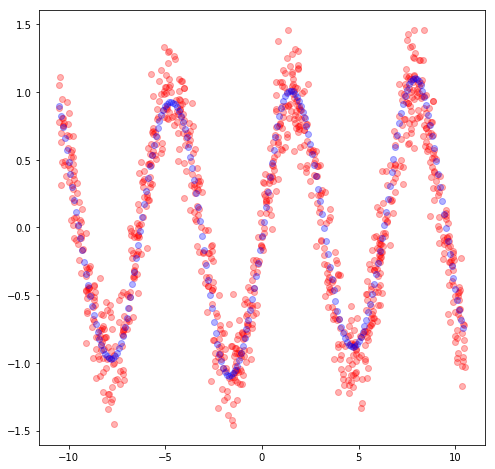

In [40]:
x_test = np.float32(np.arange(-10.5,10.5,0.1))
x_test = x_test.reshape(x_test.size,1)
y_test = model.predict(x_test)

plt.figure(figsize=(8, 8))
plot_out = plt.plot(x_data,y_data,'ro',
                   x_test,y_test,'bo',alpha=0.3)
plt.show()

This method of fitting a single input to a single output works well (or many inputs to one output), but what happens when we want to map many-to-many. Take the inverted data as an example. 

model trained!


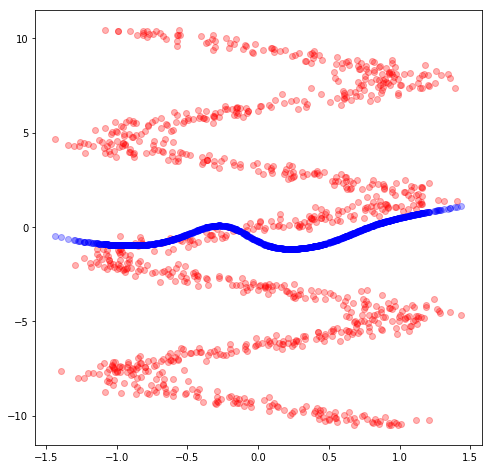

In [51]:
model_inv = Sequential()
model_inv.add(Dense(20, input_dim=1, activation='tanh'))
model_inv.add(Dense(1, activation=None))

model_inv.compile(loss='mean_squared_error', optimizer='sgd')

model.fit(y_data, x_data, epochs=1000, verbose=0)
print ('model trained!')

x_test = np.float32(np.arange(-10.5,10.5,0.1))
x_test = np.float32(np.sin(x_data)+0.2*noise_data)
x_test = x_test.reshape(x_test.size,1)
y_test = model.predict(x_test)

plt.figure(figsize=(8, 8))
plot_out = plt.plot(y_data,x_data,'ro',
                   x_test,y_test,'bo',alpha=0.3)
plt.show()

Pretty bad. But let's dissect the problem. We are using a regression to predict a single value, but now we want multiple values. Instead of regressing, can we can we have a model predict a probablity for each value in a spectrum? Put another way, can we have the model predict the probability of a distribution of numbers? Well a probability distribution can be defined by a few parameters, so that simplifies the problem consideribly! This is a powerful concept, so I will repeat myself, we will use a neural network to predict a probability distribution. 